# Projet 7 - Implementation of a scoring model
# Notebook - Model comparison

# Context




# Data sources

The webpage containing all data and descriptions: <a href="https://www.kaggle.com/c/home-credit-default-risk/data" target="_blank">here</a>.

# Glossary

__- TP:__ True positives correspond to customers which are classified as they would default the repayment of their loan and they would as expected.<br>
__- FP:__ False positives correspond to customers which were guessed trustless to repay their loans whereas they would have to (Secondary case to avoid and minimize if possible).<br>
__- FN:__ False negatives correspond to customers which were guessed trustful to repay their loans whereas they will not (Worst case to absolutly minimize).<br>
__- TN:__ True negatives correspond to customers which are classified as they would not default the repayment of their loan and they don't as expected.<br>
__- dt_sp:__ Data sampling.<br>
__- wt:__ Weight.<br>
__- opt:__ Optimal.<br>
__- synth_sp:__ Synthetic sampling.<br>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Projet-7---Implementation-of-a-scoring-model" data-toc-modified-id="Projet-7---Implementation-of-a-scoring-model-1">Projet 7 - Implementation of a scoring model</a></span></li><li><span><a href="#Notebook---Model-comparison" data-toc-modified-id="Notebook---Model-comparison-2">Notebook - Model comparison</a></span></li><li><span><a href="#Context" data-toc-modified-id="Context-3">Context</a></span></li><li><span><a href="#Data-sources" data-toc-modified-id="Data-sources-4">Data sources</a></span></li><li><span><a href="#Glossary" data-toc-modified-id="Glossary-5">Glossary</a></span></li><li><span><a href="#I)-Importation-of-the-dataset-into-a-pandas-dataframe" data-toc-modified-id="I)-Importation-of-the-dataset-into-a-pandas-dataframe-6">I) Importation of the dataset into a pandas dataframe</a></span><ul class="toc-item"><li><span><a href="#1)-Import-all-librairies-and-tools-required-to-realize-the-project-and-set-the-first-global-variables" data-toc-modified-id="1)-Import-all-librairies-and-tools-required-to-realize-the-project-and-set-the-first-global-variables-6.1">1) Import all librairies and tools required to realize the project and set the first global variables</a></span></li><li><span><a href="#2)-Settings-of-global-graphics-parameters" data-toc-modified-id="2)-Settings-of-global-graphics-parameters-6.2">2) Settings of global graphics parameters</a></span></li><li><span><a href="#3)-Global-files'-path" data-toc-modified-id="3)-Global-files'-path-6.3">3) Global files' path</a></span></li><li><span><a href="#4)-Importation-of-the-preprocessed-datasets" data-toc-modified-id="4)-Importation-of-the-preprocessed-datasets-6.4">4) Importation of the preprocessed datasets</a></span></li><li><span><a href="#5)-Separation-of-the-explicatives-and-the-explicated" data-toc-modified-id="5)-Separation-of-the-explicatives-and-the-explicated-6.5">5) Separation of the explicatives and the explicated</a></span></li></ul></li><li><span><a href="#II)-Models" data-toc-modified-id="II)-Models-7">II) Models</a></span><ul class="toc-item"><li><span><a href="#1)-Importation-of-required-libraries" data-toc-modified-id="1)-Importation-of-required-libraries-7.1">1) Importation of required libraries</a></span></li><li><span><a href="#2)-Global-variables" data-toc-modified-id="2)-Global-variables-7.2">2) Global variables</a></span></li><li><span><a href="#3)-Functions" data-toc-modified-id="3)-Functions-7.3">3) Functions</a></span><ul class="toc-item"><li><span><a href="#a)-Hyperparameter-tuning" data-toc-modified-id="a)-Hyperparameter-tuning-7.3.1">a) Hyperparameter tuning</a></span></li><li><span><a href="#b)-Model-performance-evaluation" data-toc-modified-id="b)-Model-performance-evaluation-7.3.2">b) Model performance evaluation</a></span></li><li><span><a href="#c)-Building-model-pipeline" data-toc-modified-id="c)-Building-model-pipeline-7.3.3">c) Building model pipeline</a></span></li><li><span><a href="#d)-Simplification-of-the-hyperparameters-tuning-and-the-evaluation-of-the-models" data-toc-modified-id="d)-Simplification-of-the-hyperparameters-tuning-and-the-evaluation-of-the-models-7.3.4">d) Simplification of the hyperparameters tuning and the evaluation of the models</a></span></li></ul></li><li><span><a href="#3)-Preprocessing-for-data-sampling" data-toc-modified-id="3)-Preprocessing-for-data-sampling-7.4">3) Preprocessing for data sampling</a></span></li><li><span><a href="#4)-Modelisation" data-toc-modified-id="4)-Modelisation-7.5">4) Modelisation</a></span><ul class="toc-item"><li><span><a href="#a)-Baseline-model:-Dummy-classifier" data-toc-modified-id="a)-Baseline-model:-Dummy-classifier-7.5.1">a) Baseline model: Dummy classifier</a></span><ul class="toc-item"><li><span><a href="#i.-Libraries-importation" data-toc-modified-id="i.-Libraries-importation-7.5.1.1">i. Libraries importation</a></span></li><li><span><a href="#ii.-Evaluation-on-the-cross-validated-train-data" data-toc-modified-id="ii.-Evaluation-on-the-cross-validated-train-data-7.5.1.2">ii. Evaluation on the cross validated train data</a></span></li><li><span><a href="#iii.-Generalization-over-the-test-set" data-toc-modified-id="iii.-Generalization-over-the-test-set-7.5.1.3">iii. Generalization over the test set</a></span></li></ul></li><li><span><a href="#b)-Logistic-regressor" data-toc-modified-id="b)-Logistic-regressor-7.5.2">b) Logistic regressor</a></span><ul class="toc-item"><li><span><a href="#i.-Importation" data-toc-modified-id="i.-Importation-7.5.2.1">i. Importation</a></span></li><li><span><a href="#ii.-Creation-of-the-model-pipeline" data-toc-modified-id="ii.-Creation-of-the-model-pipeline-7.5.2.2">ii. Creation of the model pipeline</a></span></li><li><span><a href="#iii.-Hyperparameters-tuning" data-toc-modified-id="iii.-Hyperparameters-tuning-7.5.2.3">iii. Hyperparameters tuning</a></span></li><li><span><a href="#iv.-Evaluation-on-the-cross-validated-train-data" data-toc-modified-id="iv.-Evaluation-on-the-cross-validated-train-data-7.5.2.4">iv. Evaluation on the cross validated train data</a></span></li><li><span><a href="#v.-Generalization-over-the-test-set" data-toc-modified-id="v.-Generalization-over-the-test-set-7.5.2.5">v. Generalization over the test set</a></span></li></ul></li><li><span><a href="#c)-Random-forest" data-toc-modified-id="c)-Random-forest-7.5.3">c) Random forest</a></span><ul class="toc-item"><li><span><a href="#i.-Importation" data-toc-modified-id="i.-Importation-7.5.3.1">i. Importation</a></span></li><li><span><a href="#ii.-Creation-of-the-model-pipeline" data-toc-modified-id="ii.-Creation-of-the-model-pipeline-7.5.3.2">ii. Creation of the model pipeline</a></span></li><li><span><a href="#iii.-Hyperparameters-tuning" data-toc-modified-id="iii.-Hyperparameters-tuning-7.5.3.3">iii. Hyperparameters tuning</a></span></li><li><span><a href="#iv.-Evaluation-on-the-cross-validated-train-data" data-toc-modified-id="iv.-Evaluation-on-the-cross-validated-train-data-7.5.3.4">iv. Evaluation on the cross validated train data</a></span></li><li><span><a href="#v.-Generalization-over-the-test-set" data-toc-modified-id="v.-Generalization-over-the-test-set-7.5.3.5">v. Generalization over the test set</a></span></li></ul></li><li><span><a href="#d)-XGBoosting" data-toc-modified-id="d)-XGBoosting-7.5.4">d) XGBoosting</a></span><ul class="toc-item"><li><span><a href="#i.-Importation" data-toc-modified-id="i.-Importation-7.5.4.1">i. Importation</a></span></li><li><span><a href="#ii.-Creation-of-the-model-pipeline" data-toc-modified-id="ii.-Creation-of-the-model-pipeline-7.5.4.2">ii. Creation of the model pipeline</a></span></li><li><span><a href="#iii.-Hyperparameters-tuning" data-toc-modified-id="iii.-Hyperparameters-tuning-7.5.4.3">iii. Hyperparameters tuning</a></span></li><li><span><a href="#iv.-Evaluation-on-the-cross-validated-train-data" data-toc-modified-id="iv.-Evaluation-on-the-cross-validated-train-data-7.5.4.4">iv. Evaluation on the cross validated train data</a></span></li><li><span><a href="#v.-Generalization-over-the-test-set" data-toc-modified-id="v.-Generalization-over-the-test-set-7.5.4.5">v. Generalization over the test set</a></span></li></ul></li><li><span><a href="#e)-LightGBM" data-toc-modified-id="e)-LightGBM-7.5.5">e) LightGBM</a></span><ul class="toc-item"><li><span><a href="#i.-Importation" data-toc-modified-id="i.-Importation-7.5.5.1">i. Importation</a></span></li><li><span><a href="#ii.-Creation-of-the-model-pipeline" data-toc-modified-id="ii.-Creation-of-the-model-pipeline-7.5.5.2">ii. Creation of the model pipeline</a></span></li><li><span><a href="#iii.-Hyperparameters-tuning" data-toc-modified-id="iii.-Hyperparameters-tuning-7.5.5.3">iii. Hyperparameters tuning</a></span></li><li><span><a href="#iv.-Evaluation-on-the-cross-validated-train-data" data-toc-modified-id="iv.-Evaluation-on-the-cross-validated-train-data-7.5.5.4">iv. Evaluation on the cross validated train data</a></span></li><li><span><a href="#v.-Generalization-over-the-test-set" data-toc-modified-id="v.-Generalization-over-the-test-set-7.5.5.5">v. Generalization over the test set</a></span></li></ul></li><li><span><a href="#f)-Models-comparison" data-toc-modified-id="f)-Models-comparison-7.5.6">f) Models comparison</a></span><ul class="toc-item"><li><span><a href="#i.-Functions" data-toc-modified-id="i.-Functions-7.5.6.1">i. Functions</a></span></li><li><span><a href="#ii.-Figures" data-toc-modified-id="ii.-Figures-7.5.6.2">ii. Figures</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Interpretations" data-toc-modified-id="Interpretations-8">Interpretations</a></span><ul class="toc-item"><li><span><a href="#Global" data-toc-modified-id="Global-8.1">Global</a></span><ul class="toc-item"><li><span><a href="#LightGBM-importance-parameter" data-toc-modified-id="LightGBM-importance-parameter-8.1.1">LightGBM importance parameter</a></span></li><li><span><a href="#SHAP" data-toc-modified-id="SHAP-8.1.2">SHAP</a></span><ul class="toc-item"><li><span><a href="#Library-importation" data-toc-modified-id="Library-importation-8.1.2.1">Library importation</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-8.1.2.2">Functions</a></span></li><li><span><a href="#Shap-explanation" data-toc-modified-id="Shap-explanation-8.1.2.3">Shap explanation</a></span></li><li><span><a href="#Interpretations" data-toc-modified-id="Interpretations-8.1.2.4">Interpretations</a></span></li></ul></li></ul></li><li><span><a href="#Local" data-toc-modified-id="Local-8.2">Local</a></span><ul class="toc-item"><li><span><a href="#Shap" data-toc-modified-id="Shap-8.2.1">Shap</a></span><ul class="toc-item"><li><span><a href="#Shap-explanation" data-toc-modified-id="Shap-explanation-8.2.1.1">Shap explanation</a></span></li><li><span><a href="#Interpretations" data-toc-modified-id="Interpretations-8.2.1.2">Interpretations</a></span></li></ul></li><li><span><a href="#Dashboard:-streamlit" data-toc-modified-id="Dashboard:-streamlit-8.2.2">Dashboard: streamlit</a></span></li><li><span><a href="#LIME" data-toc-modified-id="LIME-8.2.3">LIME</a></span></li></ul></li></ul></li><li><span><a href="#API-Flask" data-toc-modified-id="API-Flask-9">API Flask</a></span></li></ul></div>

# I) Importation of the dataset into a pandas dataframe

## 1) Import all librairies and tools required to realize the project and set the first global variables

In [32]:
### File management ###

# Files' path.
import os.path

# Save and load files.
import csv
import pickle


### Data manipulations ###

import numpy as np
from numpy import set_printoptions # Saving full data when exporting to csv format.
import pandas as pd


### Custom functions ###

from shared_functions import *


### Date & time ###

# Time measurment and datetime management
import datetime as dt
from time import time


### Warnings removal ###

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


### Data visualizations ###

from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Settings of global graphics parameters

In [33]:
### Set default figure parameters for the whole notebook ###

# Default parameters for matplotlib's figures.
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['figure.dpi'] = 200
#mpl.rcParams['axes.prop_cycle'] = cycler(color=['b', 'r', 'g'])
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

# Default parameters of seaborn's figures.
sns.set_style('white') # NB: Needs to be above sns.set_theme to properly attend custom_params.
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sns.set_theme(style='ticks', palette='deep', rc=custom_params)

## 3) Global files' path

In [34]:
# Global file paths.
#EXPORTS_DIR_PATH = 'Exports'
EXPORTS_MODELS_DIR_PATH = r'Exports\Models\Tried'
IMPORTS_DIR_PATH = r'Exports\Preprocessed_data'

CSV_MODELS_FILE = 'models_info.csv'
PKL_MODELS_FILE = 'models_info.pkl'
#JSON_MODELS_FILE = 'models_info.json'
#DATASETS_DIR_PATH = r'D:\0Partage\MP-P2PNet\MP-Sync\MP-Sync_Pro\Info\OC_DS\Projet 7\Datasets' #os.path.join('D:', '0Partage', 'MP-P2PNet', 'MP-Sync', 'MP-Sync_Pro', 'Info', 'OC_DS', 'Projet 7', 'Datasets')

## 4) Importation of the preprocessed datasets

In [35]:
df_train = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_train.csv'))
df_valid = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_valid.csv'))
df_test = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_test.csv'))
#df_new_customers = pd.read_csv(os.path.join(IMPORTS_DIR_PATH, 'preprocessed_data_new_customers.csv'))

In [36]:
del_features = ['SK_ID_CURR'] #, 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']

df_train = df_train.drop(del_features, axis=1)
df_valid = df_valid.drop(del_features, axis=1)
df_test = df_test.drop(del_features, axis=1)

In [37]:
%%time

df_train = find_int_cols(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Columns: 169 entries, NAME_CONTRACT_TYPE to TARGET
dtypes: float64(112), int64(57)
memory usage: 30.9 MB
CPU times: total: 3.66 s
Wall time: 3.65 s


In [38]:
df_train = reduce_memory(df_train)
print()
df_train.info()

Initial df memory usage is 30.94 MB for 169 columns
Final memory usage is: 8.74 MB - decreased by 71.7%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Columns: 169 entries, NAME_CONTRACT_TYPE to TARGET
dtypes: float16(71), float32(41), int16(19), int8(38)
memory usage: 8.7 MB


## 5) Separation of the explicatives and the explicated

In [39]:
X_TRAIN = df_train.drop('TARGET', axis=1)
y_TRAIN = df_train['TARGET']

#X_VALID = df_valid.drop('TARGET', axis=1)
#y_VALID = df_valid['TARGET']

X_TEST = df_test.drop('TARGET', axis=1)
y_TEST = df_test['TARGET']

# II) Models

## 1) Importation of required libraries

In [40]:
# Additional common libraries.
from numpy import argmax, argmin
import math
from random import sample as py_rd_sp # Python random sampling.

# sklearn tools ad libraries.
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, fbeta_score, confusion_matrix

# Make a sklearn job scorer.
from sklearn.metrics import make_scorer

# Data sampling.
from imblearn.pipeline import Pipeline # NB: imbalearn.pipeline.Pipeline allows to properly deal the SMOTE on the train set and avoid the validation/test sets.
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC # NB: SMOTENC can manage categorial features while SMOTE cannot.

*NB: In order to calculate the best probability threshold the AUCROC is selected over the AUCPR since the first one focuses on the FP and FN balance (the 2 most important values to consider for this project) while the AUCPR focused exclusively on the positive (minority class) (=> FP) which does not take into account the most relevant value for this project (FN).*

## 2) Global variables

In [41]:
# True: Allows hyperprameter tuning, False: Get the results stored from the last hyperparameters tuning.
HT = True

# For imbalanced data use weight or data sampling.
IMB_PROCESS = 'Resp' #'Weight'


# Global common scaler to use.
SCALER = MinMaxScaler()
if SCALER != None:
    SCALER_PREFIX_LABEL = 'scl_'

# Initialize the default cross validation method to use.
SKF_5 = StratifiedKFold(5, shuffle=True, random_state=0)


# Set and initialize the main scorer used for the models comparisons.
MAIN_SCORER_TRAIN_LABEL = 'Job_score_train'
MAIN_SCORER_TEST_LABEL = 'Job_score_test'
MAIN_SCORER_VAL = 0


# Load/create and initialize the dataframe in which store all relevant models' information (best hyperparameters, scores...).
# NB: In case of the creation of the file data=np.full((1,len(l_COL_LABELS)), None) to force dtypes as objects
#     until one of the next added entries (rows) are full then, it will be removed. Otherwise, the np.nan values which will appear
#     within the first row will convert their columns' dtypes to float64 and prevent their replacement
#     by objects such as np.array.
l_COL_LABELS = ['Model_labels', 'Models',
                'yhat_train', 'yhat_test',
                'Best_proba_threshold_train', 'Best_proba_threshold_test',
                MAIN_SCORER_TRAIN_LABEL, MAIN_SCORER_TEST_LABEL, 
                'AUROC_scores_train', 'AUROC_scores_test',
                'F-bêta_score_train', 'F-bêta_score_test',
                'Process_time_train (s)', 'Process_time_test (s)',
                'Confusion_matrix_values_train ([TP, FP, FN, TN])', 'Confusion_matrix_values_test ([TP, FP, FN, TN])'
               ]

# Update the csv file containing the training information and scores of the model or not (True = update, False = create a new one).
GET_CSV_FILE = True
if GET_CSV_FILE:
    try:
        df_MODELS = pd.read_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))#.set_index('Model_labels')

    except:
        print("No csv models informations were found. A new one is created...")
        df_MODELS = pd.DataFrame(data=np.full((1,len(l_COL_LABELS)), None), columns=l_COL_LABELS).set_index('Model_labels')
        df_MODELS.to_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))
        print('Done !')
    
else:
    print("Creation of a new csv file to store models informations...")
    df_MODELS = pd.DataFrame(data=np.full((1,len(l_COL_LABELS)), None), columns=l_COL_LABELS).set_index('Model_labels')
    df_MODELS.to_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))
    print('Done !')  

display(df_MODELS.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, wt_dummy_clf to wt_scl_lgbm_clf_opt
Data columns (total 15 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Models                                            11 non-null     object 
 1   yhat_train                                        11 non-null     object 
 2   yhat_test                                         11 non-null     object 
 3   Best_proba_threshold_train                        11 non-null     float64
 4   Best_proba_threshold_test                         11 non-null     object 
 5   Job_score_train                                   11 non-null     float64
 6   Job_score_test                                    11 non-null     object 
 7   AUROC_scores_train                                11 non-null     float64
 8   AUROC_scores_test                                 11 non-null     object 
 9   

None

In [42]:
df_MODELS

Models   
Model_labels                                                                 
wt_dummy_clf                      (DummyClassifier(strategy='stratified'))  \
wt_logi_reg_clf_opt      (LogisticRegression(C=10.0, class_weight='bala...   
wt_rf_clf_opt            ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt           (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt          (LGBMClassifier(class_weight='balanced', colsa...   
wt__scl_dummy_clf        (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_logi_reg_clf_opt  (MinMaxScaler(), LogisticRegression(C=0.1, cla...   
wt_scl_rf_clf_opt        (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
wt_scl_xgb_clf_opt       (MinMaxScaler(), XGBClassifier(base_score=None...   
wt_scl_lgbm_clf_opt      (MinMaxScaler(), LGBMClassifier(class_weight='...   

                                                                yhat_train   
Model_labels                                                                 
wt_dummy_clf             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt      [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt            [0.5402593881951335, 0.666153240733321, 0.2059...   
wt_xgb_clf_opt           [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt          [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf         [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
wt_scl_logi_reg_clf_opt  [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt        [0.41599445259826257, 0.6717023650467243, 0.21...   
wt_scl_xgb_clf_opt       [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt      [0.41780578654157957, 0.64516167621025, 0.2041...   

                                                                 yhat_test   
Model_labels                                                                 
wt_dummy_clf             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt      [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt            [0.47087781094224285, 0.633438976839338, 0.209...   
wt_xgb_clf_opt           [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt          [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf         [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_logi_reg_clf_opt  [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt        [0.5270956500020593, 0.6646669472798391, 0.163...   
wt_scl_xgb_clf_opt       [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt      [0.41780578654157957, 0.64516167621025, 0.2041...   

                         Best_proba_threshold_train Best_proba_threshold_test   
Model_labels                                                                    
wt_dummy_clf                                  0.000                       1.0  \
wt_logi_reg_clf_opt                           0.480                      0.48   
wt_rf_clf_opt                                 0.360                     0.375   
wt_xgb_clf_opt                                0.450                      0.45   
wt_lgbm_clf_opt                               0.455                     0.455   
wt__scl_dummy_clf                             1.000                       1.0   
wt_scl_dummy_clf                              1.000                       0.0   
wt_scl_logi_reg_clf_opt                       0.495                     0.495   
wt_scl_rf_clf_opt                             0.400                     0.405   
wt_scl_xgb_clf_opt                            0.450                      0.45   
wt_scl_lgbm_clf_opt                           0.455

## 3) Functions 

### a) Hyperparameter tuning

In [43]:
def hyper_tune_rand_grid (model, X, y, para_grid, score, cv, score_label = 'score',
                          n_iter = 100, grid_loop = 1, range_precision = None, rand_state = 0, verbose = 0):
    
    """
    Description
    -----------
    Tune the chosen hyperapameters of the model by checking a random number of combinations with the RandomizedSearchCV() method.
    This function tunes the hyperparameters by taking the best combination among the best one found in each loop run.
    
    Parameters
    ----------
    model: sklearn model
        Model to test.
    X: pandas.Dataframe()
        Dataframe of the explicatives.
    y: pandas.Dataframe()
        Dataframe of the explicated.
    n_folds: int
        Split parameter of the KFold function.
    para_grid: dictionary
        Parameters of the model to tune.
    n_iter: int
        Number of combinations of hyperparameters within which the RandomizedSearchCV will pick the best.
    grid_loop:
        Number of loop run.
    range_precision: int
        Number of decimals to round to.
    int_para_names: list of strings
        Hyperparameters which accept only integers.
    bool_para_names: list of strings
        Hyperparameters which accept only booleans.
    rand_state: int
        random_state parameter in order to fix the randomness of the runs.

    Return: sklearn.RandomizedSearchCV()
    ------
    Returns the fitted randomized model grid.
        
    """      
    
    def show ():
        
        """
        Description
        -----------
        Show relevant information at the end of the process.
        
        """  
        
        # Fit the grid model.
        model_grid.fit(X, y)
        
        # Display the best hyperparameter.
        print("\nBest estimator found:\n", model_grid.best_estimator_)
        print("\nBest score found:\n", score_label, '=', round(model_grid.best_score_, 3))
        print("\nBest hyperparameters found:\n", model_grid.best_params_)  

        
    # Set the KFold cross validation with the selected n_folds.
    #skf = StratifiedKFold(n_folds, shuffle=True, random_state=0)

    # Create a dictionary with all parameters to test as keys and empty lists as values.
    best_para_stored = para_grid.copy()
    for key in best_para_stored.keys():
        best_para_stored[key] = []

    
    for i in range(grid_loop):
               
        # Random search of parameters, use all available cores.
        model_grid = RandomizedSearchCV(estimator=model, param_distributions=para_grid, cv=cv, scoring=score,
                                        n_iter=n_iter, refit=True, n_jobs=-1, random_state=rand_state, verbose=verbose)
         
        # Fit the random grid.
        # NB: Step needed to be able to get the "best_params_" method.
        model_grid.fit(X, y)#.to_numpy().ravel())

        # Get the best parameters values in a dictionary.
        best_para = model_grid.best_params_
        
        # Loop to store the best parameter got in this loop run, in order to make the average at the end of all runs.
        for key in best_para_stored.keys():
            
            # Get the best value for the "key" parameter.
            if range_precision != None:
                best_para_value = round(best_para.get(key), range_precision)
            else:
                best_para_value = best_para.get(key)
            
            # Store this value in the dictionary set at the beginning of the function ("best_para_stored").
            best_para_stored[key].append(best_para_value)
            
            # Remove duplicates.
            best_para_stored[key] = list(set(best_para_stored[key]))
    

    # Replace the initial parameters with the best ones found.
    para_grid = best_para_stored
    
    # Find the best parameter among the best found.
    model_grid = GridSearchCV(estimator=model, param_grid=para_grid, cv=cv, scoring=score, n_jobs=-1, verbose=verbose)
    
    # Show results.
    show()
        
    return model_grid

### b) Model performance evaluation

In [44]:
def evaluate (y_pred_proba_P, y_true = y_TEST, fig = (1,1,1,1), l_model_labels = ['Model']):
      
    global MAIN_SCORER_VAL
    
    ### Calculate necessary variables.
    
    # List of the probability thresholds to try.
    l_proba_thrs = np.linspace(0, 1, num=201)
    
    # Get the predictions corresponding to each probability thresholds tried.
    l_y_pred = get_y_pred_list(y_pred_proba_P, l_proba_thrs)
    
    # Get the corresponding TP, FP, FN and TN for each probability thresholds tried.
    np_tp, np_fp, np_fn, np_tn = np.array(get_tp_fp_fn_tn_lists(y_true, l_y_pred))
    
    # FN cost coefficient (FN ~ 10 FP).
    fn_cost_coeff = 10
    
    # Display figures configuration.
    n_fig = fig.count(1)
    
    if n_fig != 0:
        plt.figure(figsize=(12,12), dpi=300)
        p = 0
        if n_fig == 1:
            l = 1; c = 1
        elif n_fig == 2:
            l = 1; c = 2
        elif n_fig >= 3:
            l = 2; c = 2  
    
    
    ### Calculate the optimal probability threshold.
    
    # Calculate the optimal threshold.
    model_best_thr, best_thr_idx = opt_proba_thr(np_tp, np_fp, np_fn, np_tn, l_proba_thrs)    
    
    # Plot figures.
    if fig[0]:
        p += 1 
        plt.subplot(l,c,p)
        figure_density(y_true, y_pred_proba_P, model_best_thr)
    
    if fig[1]:
        p += 1 
        plt.subplot(l,c,p)
        figure_sum_fp_coeff_fn(np_fp, np_fn, l_proba_thrs, model_best_thr, fn_cost_coeff)
    
    
    ### Calculate scores.
    
    # ROC AUC score.
    roc_auc_s = roc_auc_score(y_true, y_pred_proba_P)
    print('\nROC-AUC = %f' % roc_auc_s) #%.3f
    
    # Plot figure.
    if fig[2]:
        p += 1 
        plt.subplot(l,c,p)
        figure_roc(y_true, [y_pred_proba_P], l_model_labels)
    
    
    # F-bêta score.
    # NB: Square beta = cost FN / cost FP = 10
    square_beta = 100
    beta = round(math.sqrt(square_beta), 2)
      
    # Calculate the F-bêta score for each probability thresholds tried.
    l_fbeta = []
    for y_pred in l_y_pred:
        fbeta = fbeta_score(y_true, y_pred, beta=beta)
        l_fbeta.append(fbeta)
    fbeta = get_fbeta_score(l_proba_thrs, l_fbeta, beta, model_best_thr, best_thr_idx)

    # Plot figure.
    if fig[3]:
        p += 1 
        plt.subplot(l,c,p)
        figure_fbeta_score(l_proba_thrs, l_fbeta, model_best_thr)
    
    
    # Job score.
    g_norm = gain_norm(y_true, l_y_pred[best_thr_idx])
    MAIN_SCORER_VAL = g_norm
    print("Job score: %.3f" % g_norm)
  
    
    print("\n" + "-" * 100 + "\n")
    # Draw figures.
    if fig != (0,0,0,0):
        plt.show()
        
        
    # Confusion matrix.
    print("Confusion matrix:")
    figure_confusion_matrix(y_true, l_y_pred[best_thr_idx])
        
    return model_best_thr, g_norm, roc_auc_s, fbeta, [np_tp[best_thr_idx], np_fp[best_thr_idx], np_fn[best_thr_idx], np_tn[best_thr_idx]]

### c) Building model pipeline

In [45]:
def select_model_label (imb_process, label_root, scaler_prefix_label = SCALER_PREFIX_LABEL):

    if imb_process == 'Resp':
        model_label = scaler_prefix_label + 'resp_' + label_root
    elif imb_process == 'Weight':
        model_label = scaler_prefix_label + 'wt_' + label_root
    else:
        model_label = label_root
    
    return model_label

In [46]:
def set_model_pipeline (model, scaler, imb_process):
    
    # Initiliaze the model or the pipeline with its default values.
    # NB: scaler = MinMaxScaler() as binary categories won't be changed and
    #     the distance between all other values of a feature will be kept.
    pipe_vars = []
    if scaler != None:
        pipe_vars.append(('scaler', scaler))
            
    if imb_process == 'Resp':
        pipe_vars.append(['resampler', SMOTE(random_state=0)])
        pipe_vars.append(['model', model])
    else:
        pipe_vars.append(['model', model])
                            
    model_pl = Pipeline(pipe_vars)
        
    return model_pl

### d) Simplification of the hyperparameters tuning and the evaluation of the models

In [47]:
"""def block_build_model_pl (model, imb_process = IMB_PROCESS, scaler = SCALER):
    
    # Way to manage imbalanced data.
    imb_process = None

    # Create the label of the model.
    model_label = select_model_label(imb_process, 'dummy_clf')

    # Initiliaze the model or the pipeline with its default values.
    # NB: scaler = MinMaxScaler() as binary categories won't be changed and
    #     the distance between all other values of a feature will be kept.
    model_pl = set_model_pipeline(model, scaler, imb_process)
        
    return model_pl, model_label"""

"def block_build_model_pl (model, imb_process = IMB_PROCESS, scaler = SCALER):\n    \n    # Way to manage imbalanced data.\n    imb_process = None\n\n    # Create the label of the model.\n    model_label = select_model_label(imb_process, 'dummy_clf')\n\n    # Initiliaze the model or the pipeline with its default values.\n    # NB: scaler = MinMaxScaler() as binary categories won't be changed and\n    #     the distance between all other values of a feature will be kept.\n    model_pl = set_model_pipeline(model, scaler, imb_process)\n        \n    return model_pl, model_label"

In [48]:
def block_hyperparams_tune (df = df_MODELS, X = X_TRAIN, y = y_TRAIN, cv = SKF_5, tune = HT,
                            n_iter = 20, grid_loop = 1, range_precision = None, rand_state = 0, verbose = 2):
    
    # Tune the hyperparameters of the model.
    # NB: Verbose displays within the terminal of the server session.
    if tune:
        model_grid = hyper_tune_rand_grid(model_pl, X, y, hyperparams_grid, g_norm_scorer, cv,
                                          n_iter=n_iter, grid_loop=grid_loop, range_precision=range_precision,
                                          rand_state=rand_state, verbose=verbose)

        # Get the model set with the best hyperparameters found.
        model_pl_opt = model_grid.best_estimator_

    # Load the last values calculated for the hyperparameters.
    else:
        df = pd.read_pickle(os.path.join(EXPORTS_MODELS_DIR_PATH, PKL_MODELS_FILE))#.set_index('Model_labels')
        model_pl_opt = df.loc['Logi_reg_opt', 'Models']
    
    return model_pl_opt

In [49]:
def block_evaluate (model_pl, df, model_label, X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                    eval_dataset = 'valid_set', get_csv_file = GET_CSV_FILE):

    # Train the model and get its predictions probabilities.
    y_pred_proba_NP, process_time = model_fit_predict(model_pl, X_TRAIN, y_TRAIN, SKF_5)

    # Evaluate the model.
    best_thr, g_norm, rocauc, fbeta, cm_vals = evaluate(y_pred_proba_NP[:,1], y_true=y_TRAIN)
    
    # Store the relevant values in the model storage dataframe.
    l_vars = [model_label, model_pl, y_pred_proba_NP[:,1], best_thr, g_norm, rocauc, fbeta, process_time, cm_vals]

    # Update the csv file if the main score is higher and the user allowed it.
    print("\n" + "-" * 100 + "\n")
    df = update_sum_table(df, l_vars, get_csv_file, eval_dataset, MAIN_SCORER_VAL, l_COL_LABELS)

    return df

## 3) Preprocessing for data sampling

*NB: SMOTE should be applied on the train set only.*

In [50]:
from imblearn.pipeline import Pipeline # NB: imbalearn.pipeline.Pipeline allows to properly deal the SMOTE on the train set and avoid the validation/test sets.
from imblearn.over_sampling import SMOTENC, SMOTE # NB: SMOTENC can manage categorial features while SMOTE cannot.

In [51]:
# Create a mask which will indicate SMOTENC which features it should consider as a category.
# NB: In practice the trick is to consider all "int" columns as categories in order to force SMOTE
#     to avoid to return float values for these columns.
l_CAT_COLS = []
l_CAT_COLS_MASK = []
for col in X_TRAIN.columns:
    col_type = X_TRAIN[col].dtypes
    if col_type != object:
        if str(col_type)[:3] == 'int':
            l_CAT_COLS.append(col)
            l_CAT_COLS_MASK.append(True)
        else:
            l_CAT_COLS_MASK.append(False)

print("List of names of the %i categorical features:\n %s" % (len(l_CAT_COLS), l_CAT_COLS))

List of names of the 56 categorical features:
 ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_WORK_PHONE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'WALLSMATERIAL_MODE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_18', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT', 'DOCUMENT_COUNT', 'AGE_RANGE', 'INS_SK_ID_PREV_SIZE', 'INS_SK_ID_PREV_NUNIQUE', 'INS_DAYS_ENTRY_PAYMENT_MIN', 'INS_DAYS_ENTRY_PAYMENT_MAX', 'INS_DPD_MAX', 'INS_DBD_MAX', 'INS_LATE_PAYMENT_SUM', 'INS_SIGNIFICANT_LATE_PAYMENT_SUM',

In [52]:
display_EZ(df_train[l_CAT_COLS])

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  NAME_TYPE_SUITE   
0                       0            0             1                0  \
1                       0            1             0                0   
2                       0            1             0                1   
3                       0            1             1                0   
4                       0            0             1                0   
...                   ...          ...           ...              ...   
23994                   0            1             0                0   
23995                   0            1             0                1   
23996                   0            0             1                0   
23997                   0            0             0                0   
23998                   1            1             1                0   

       NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS   
0                     0                    0                   0  \
1                     3                    0                   1   
2                     0                    1                   2   
3                     0                    0                   2   
4                     0                    0                   1   
...                 ...                  ...                 ...   
23994                 0                    1                   1   
23995                 3                    0                   1   
23996                 2                    0                   1   
23997                 0                    0                   1   
23998                 0                    0                   1   

       NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION   
0                      0       -8874          -1706              -1302  \
1                      0      -18529          -1709              -2460   
2                      0      -15285          -8164              -9256   
3                      2      -10147          -2900              -2420   
4                      0      -16506           -478              -7340   
...                  ...         ...            ...                ...   
23994                  0      -16929          -1714              -4644   
23995                  0      -20859          -1709             -11120   
23996                  0      -20293         -11840              -4828   
23997                  0      -14233           -402              -5716   
23998                  2       -8957           -866              -8688   

       DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_WORK_PHONE  OCCUPATION_TYPE   
0                -1302           12                0                5  \
1                -2078            9                0               -1   
2                -4599            9                1               -1   
3                 -439           39                0                7   
4                  -58            7                0                4   
...                ...          ...              ...              ...   
23994             -463            9                0                3   
23995            -4046            9                0               -1   
23996            -3228           14                1                0   
23997            -5091            9                0                0   
23998             -637           64                0               14   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY   
0                         2                            2  \
1                         2                            2   
2                         3                            3   
3                         2                            2   
4                         2                            2   
...                     ...                          ...   
23994                     2                            2   
23995                     2                            2   
23996  

In [53]:
# Create the models.
smote_nc = SMOTENC(categorical_features=l_CAT_COLS_MASK, random_state=0)

# Create the model's pipeline.
smote_nc_pipe = Pipeline([('scaler', StandardScaler(copy=True)),
                          ('resampler', smote_nc)]
                        )

# Show the pipeline hyperparameters. 
pprint(smote_nc_pipe.get_params(), compact=True)

{'memory': None,
 'resampler': SMOTENC(categorical_features=[True, True, True, False, False, False, False,
                              True, True, True, True, True, False, True, True,
                              True, True, True, True, True, True, True, True,
                              True, True, True, True, False, False, False, ...],
        random_state=0),
 'resampler__categorical_features': [True, True, True, False, False, False,
                                     False, True, True, True, True, True, False,
                                     True, True, True, True, True, True, True,
                                     True, True, True, True, True, True, True,
                                     False, False, False, False, False, False,
                                     False, False, False, False, False, False,
                                     False, False, True, True, True, True, True,
                                     True, True, True, True, True, True, Fal

In [54]:
# Set the SMOTE hyperparameters range.
k_neighbors = [int(x) for x in np.linspace(start=3, stop=10, num=5)]
sampling_strategy = [round(x, 2) for x in np.linspace(start=0.2, stop=1.0, num=5)]

# Generate the grid.
SMOTE_GRID = ({'resampler__k_neighbors': k_neighbors,
               'resampler__sampling_strategy': sampling_strategy
              })

**/!\ Finally the following this part was not used as SMOTENC() does not work with RandomizedSearchCV() (scorers returns NaN and sometimes memory problems occur). Nevertheless, it should not be much of a problem as integer columns should be able to only accept integers and so force SMOTE to return integer values or trunc float to integer and after the normalization (MinMaxScaler()) only binary categories will remain integers /!\ .**

__- Annexe__

In [55]:
### Method to normalize selected columns.

#from sklearn.compose import ColumnTransformer

#l_NUM_COLS = X_TRAIN.columns[~np.array(l_CAT_COLS_MASK)]
#num_cols_norm = ColumnTransformer([('num_cols', StandardScaler(), l_NUM_COLS),
#                                   ('cat_cols', 'passthrough', l_CAT_COLS)]) #NB: 'passthrough' allows to ignore the set columns.

#df = pd.DataFrame(MinMaxScaler().fit_transform(X_TRAIN), columns=X_TRAIN.columns)
#display_EZ(df[l_CAT_COLS])

## 4) Modelisation

### a) Baseline model: Dummy classifier

#### i. Libraries importation

In [56]:
from sklearn.dummy import DummyClassifier

In [57]:
# Initiliaze the model with its default values.
model = DummyClassifier(strategy="stratified")

# Add a scaler to transform data prior modelisation.
scaler = SCALER

# Imbalance process management method.
imb_process = IMB_PROCESS

# Set the label of the model according to the way imbalaced data is managed.
model_label = select_model_label(imb_process, 'dummy_clf')

# Build the model or the pipeline with its default values.
# NB: scaler = MinMaxScaler() as binary categories won't be changed and
#     the distance between all other values of a feature will be kept.
model_pl = set_model_pipeline(model, scaler, imb_process)

# Check the pipeline.
model_pl

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['resampler', SMOTE(random_state=0)],
                ['model', DummyClassifier(strategy='stratified')]])

#### ii. Evaluation on the cross validated train data


ROC-AUC = 0.502377
F-Bêta score of the optimal threshold found = 0.477
Highest F-Bêta score = 0.477
Job score: 0.502

----------------------------------------------------------------------------------------------------



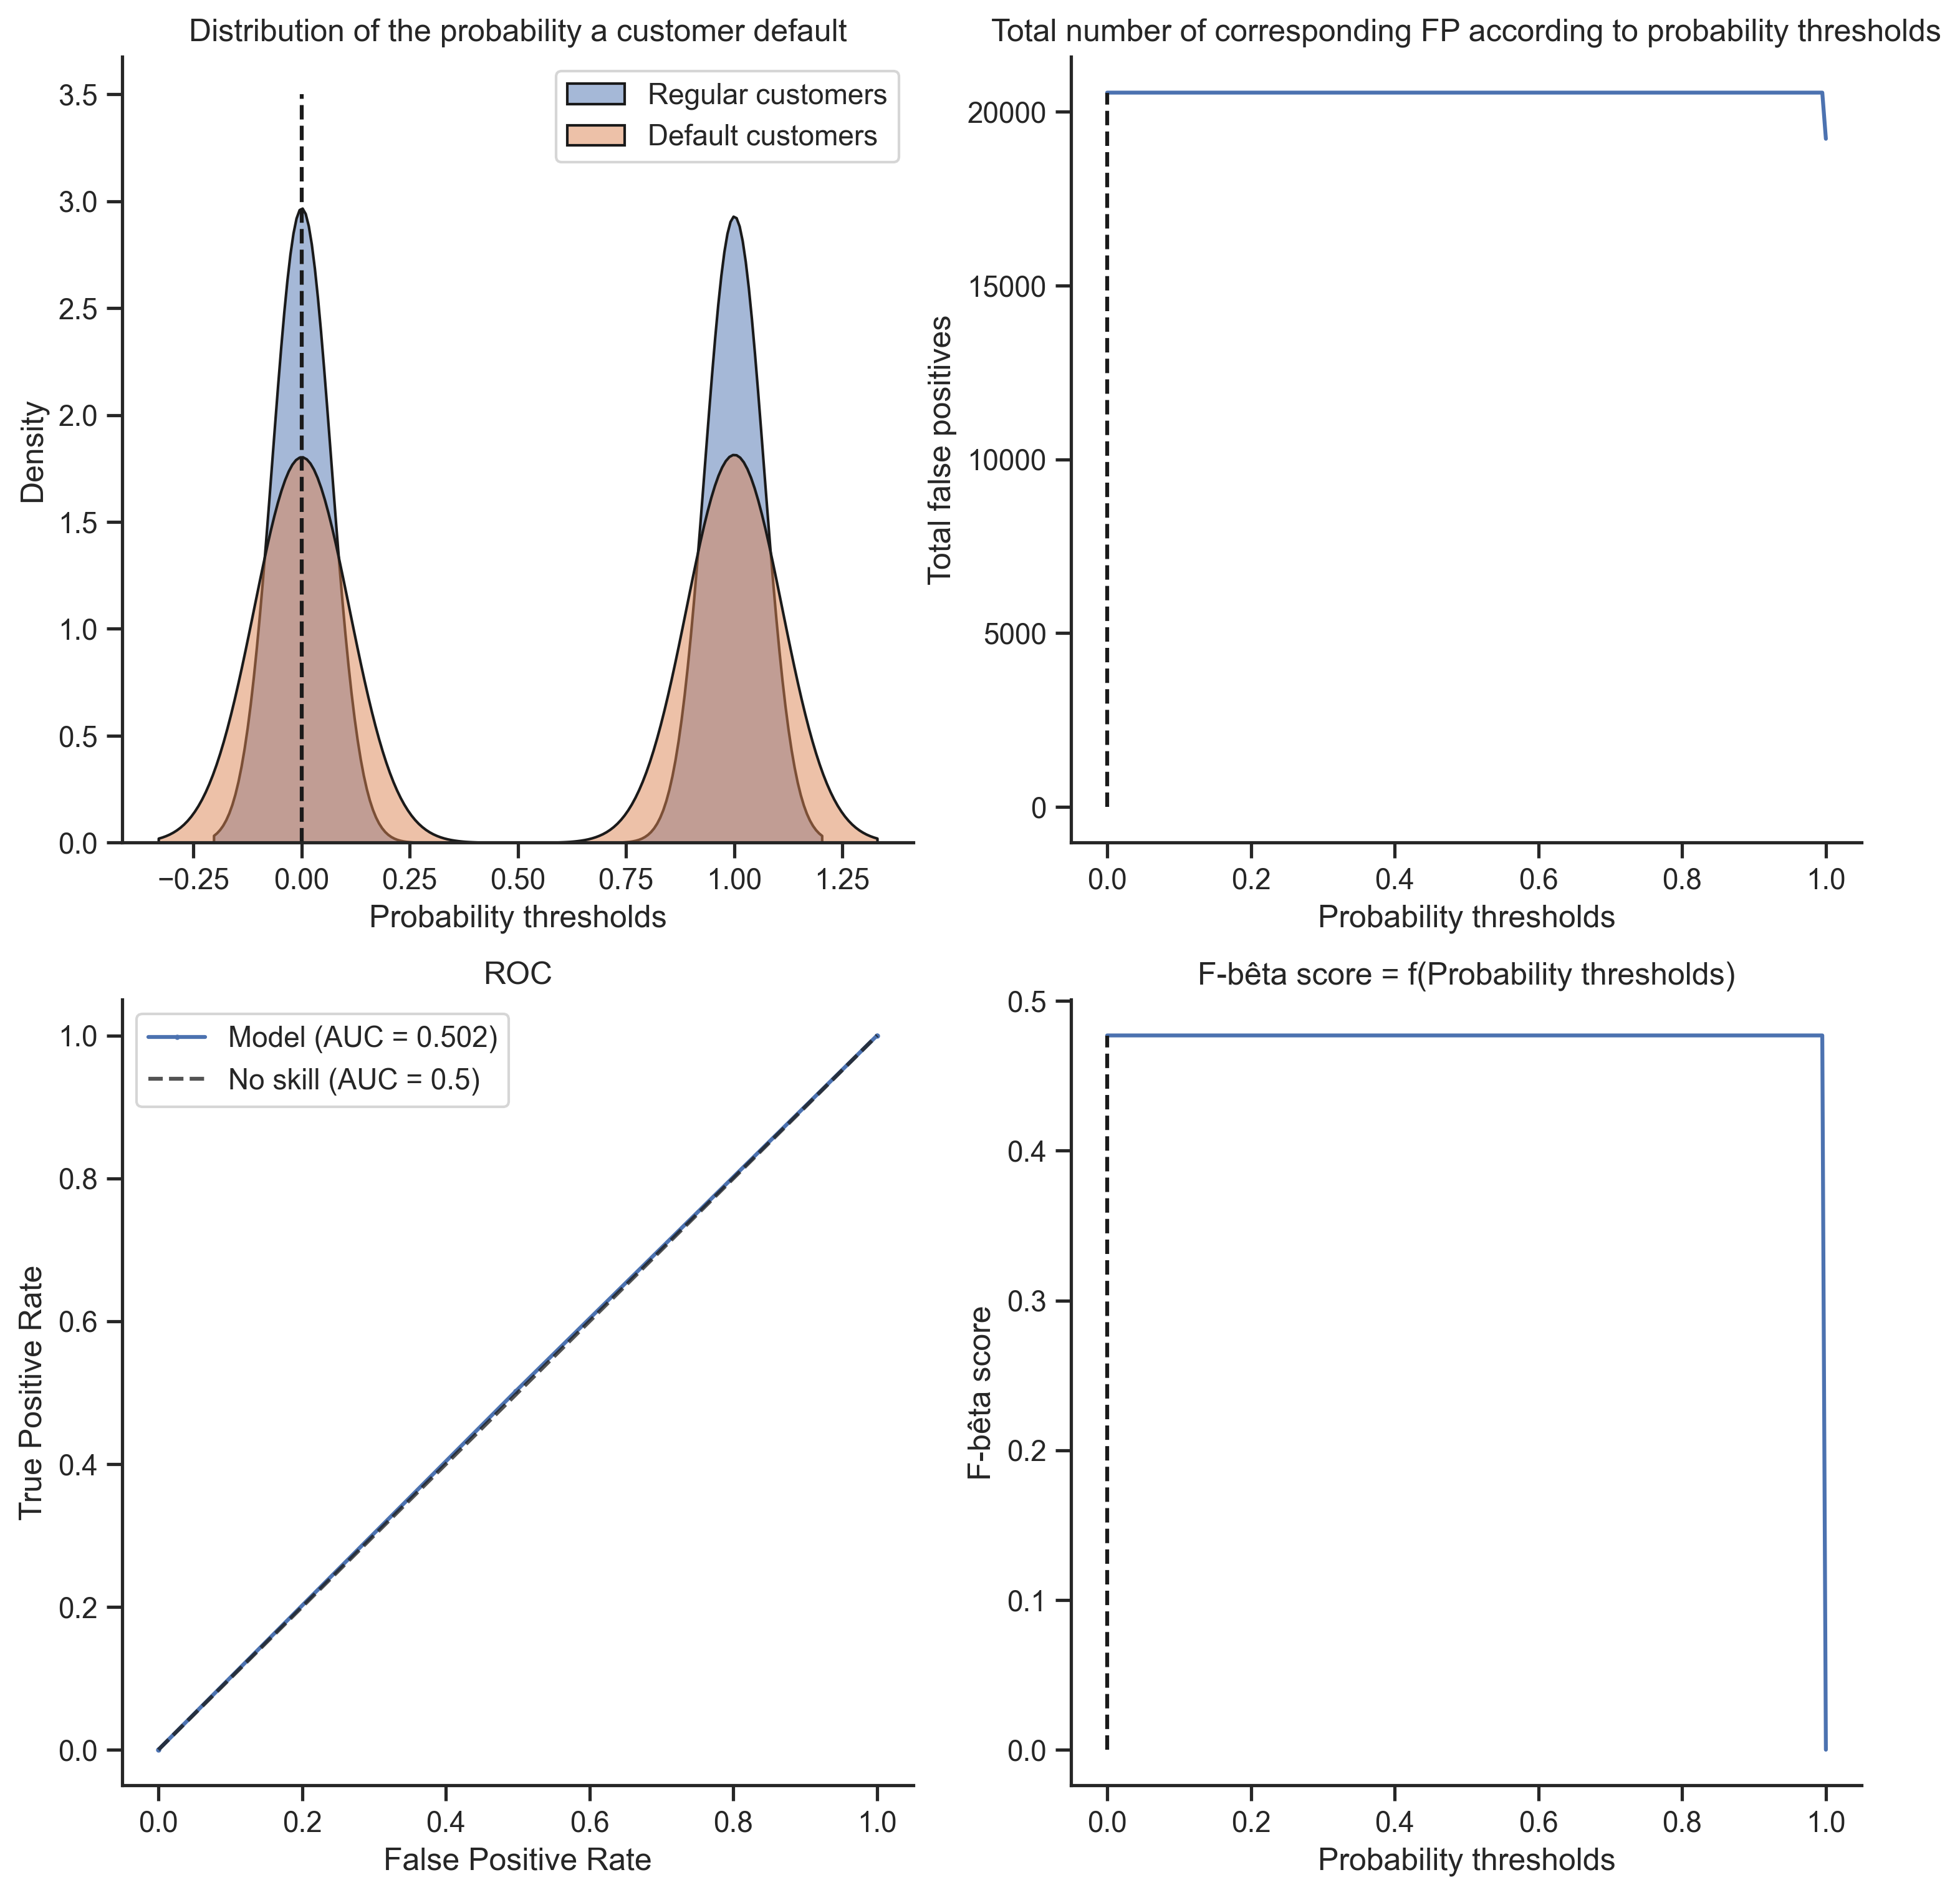

Confusion matrix:



----------------------------------------------------------------------------------------------------

Creating new entry...
Done!
The new informations have been saved in a new row.


Models   
Model_labels                                                                 
wt_dummy_clf                      (DummyClassifier(strategy='stratified'))  \
wt_logi_reg_clf_opt      (LogisticRegression(C=10.0, class_weight='bala...   
wt_rf_clf_opt            ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt           (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt          (LGBMClassifier(class_weight='balanced', colsa...   
wt__scl_dummy_clf        (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_logi_reg_clf_opt  (MinMaxScaler(), LogisticRegression(C=0.1, cla...   
wt_scl_rf_clf_opt        (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
wt_scl_xgb_clf_opt       (MinMaxScaler(), XGBClassifier(base_score=None...   
wt_scl_lgbm_clf_opt      (MinMaxScaler(), LGBMClassifier(class_weight='...   
resp_scl_dummy_clf       (MinMaxScaler(), SMOTE(random_state=0), DummyC...   

                                                                yhat_train   
Model_labels                                                                 
wt_dummy_clf             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt      [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt            [0.5402593881951335, 0.666153240733321, 0.2059...   
wt_xgb_clf_opt           [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt          [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf         [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
wt_scl_logi_reg_clf_opt  [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt        [0.41599445259826257, 0.6717023650467243, 0.21...   
wt_scl_xgb_clf_opt       [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt      [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   

                                                                 yhat_test   
Model_labels                                                                 
wt_dummy_clf             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt      [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt            [0.47087781094224285, 0.633438976839338, 0.209...   
wt_xgb_clf_opt           [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt          [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf         [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_logi_reg_clf_opt  [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt        [0.5270956500020593, 0.6646669472798391, 0.163...   
wt_scl_xgb_clf_opt       [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt      [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf                                                     NaN   

                         Best_proba_threshold_train Best_proba_threshold_test   
Model_labels                                                                    
wt_dummy_clf                                  0.000                       1.0  \
wt_logi_reg_clf_opt                           0.480                      0.48   
wt_rf_clf_opt                                 0.360                     0.375   
wt_xgb_clf_opt                                0.450                      0.45   
wt_lgbm_clf_opt                               0.455                     0.455   
wt__scl_dummy_clf                             1.000                       1.0   
wt_scl_dummy_clf                              1.000                       0.0   
wt_scl_logi_reg_clf_opt                       0.495         

In [58]:
# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                           eval_dataset = 'valid_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

#### iii. Generalization over the test set


ROC-AUC = 0.503145
F-Bêta score of the optimal threshold found = 0.481
Highest F-Bêta score = 0.481
Job score: 0.503

----------------------------------------------------------------------------------------------------



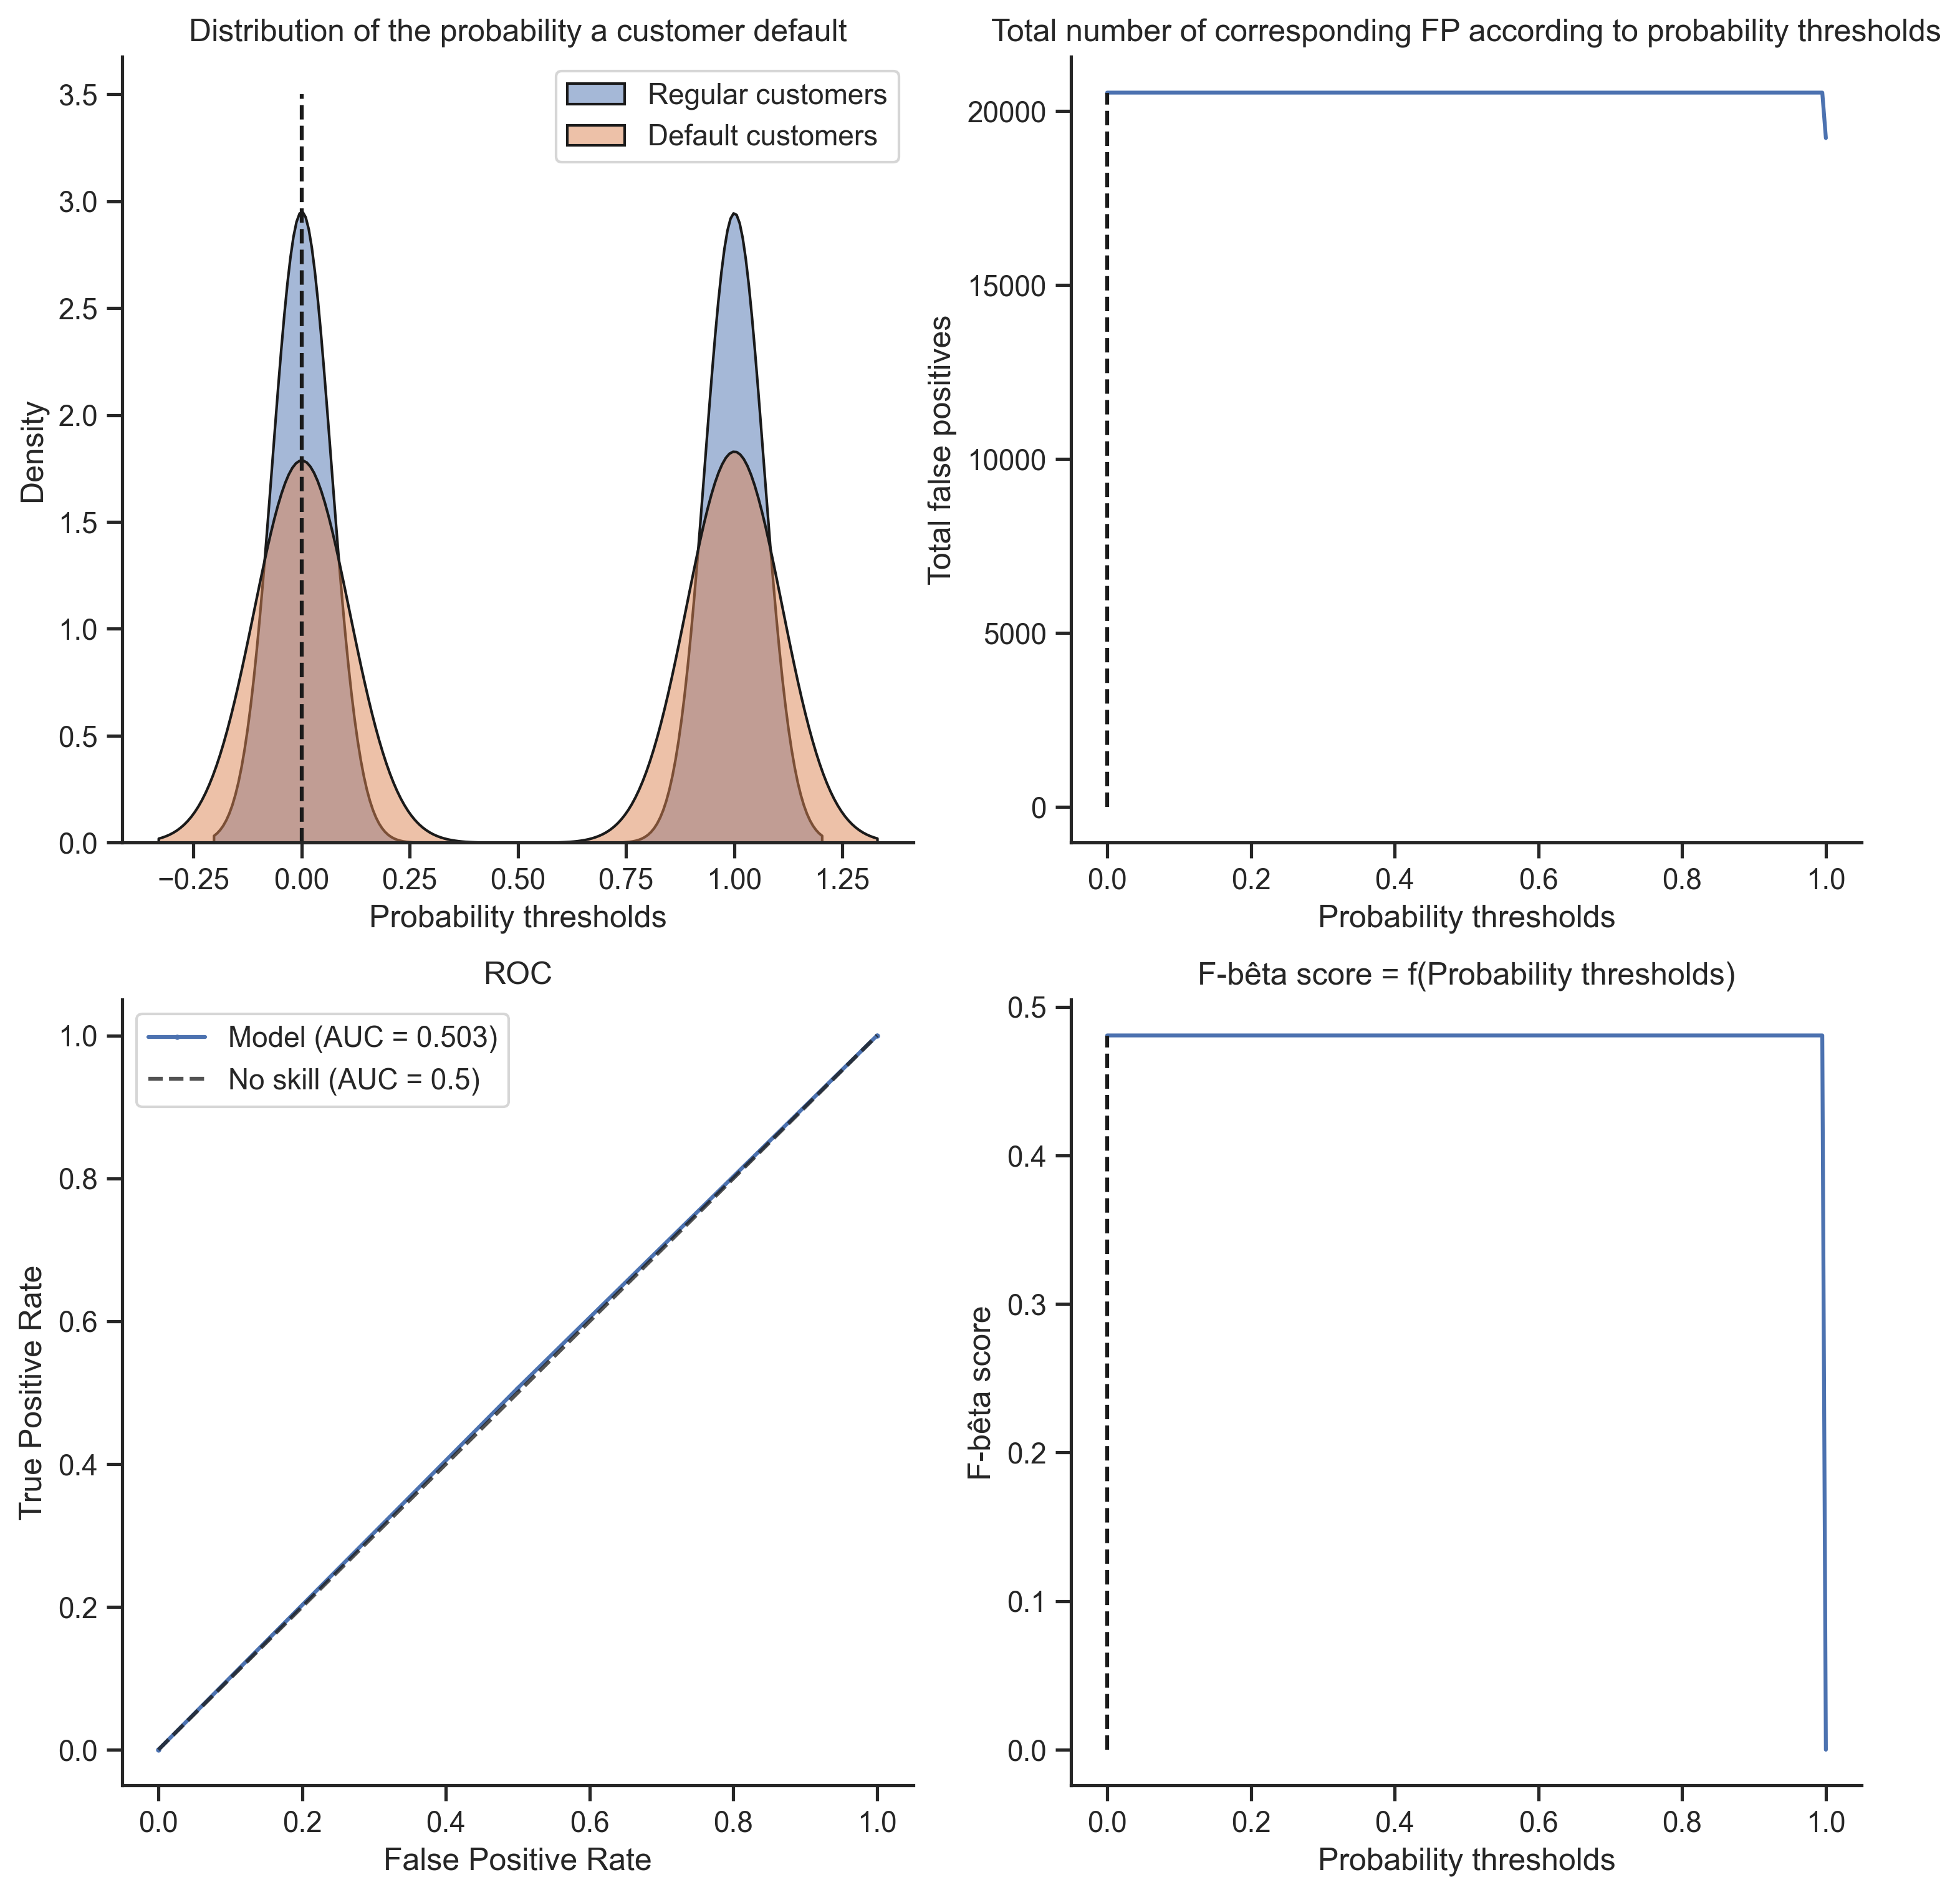

Confusion matrix:



----------------------------------------------------------------------------------------------------

Updating entry...
Done!
The row have been updated.


Models   
Model_labels                                                                 
wt_dummy_clf                      (DummyClassifier(strategy='stratified'))  \
wt_logi_reg_clf_opt      (LogisticRegression(C=10.0, class_weight='bala...   
wt_rf_clf_opt            ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt           (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt          (LGBMClassifier(class_weight='balanced', colsa...   
wt__scl_dummy_clf        (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_dummy_clf         (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_logi_reg_clf_opt  (MinMaxScaler(), LogisticRegression(C=0.1, cla...   
wt_scl_rf_clf_opt        (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
wt_scl_xgb_clf_opt       (MinMaxScaler(), XGBClassifier(base_score=None...   
wt_scl_lgbm_clf_opt      (MinMaxScaler(), LGBMClassifier(class_weight='...   
resp_scl_dummy_clf       (MinMaxScaler(), SMOTE(random_state=0), DummyC...   

                                                                yhat_train   
Model_labels                                                                 
wt_dummy_clf             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt      [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt            [0.5402593881951335, 0.666153240733321, 0.2059...   
wt_xgb_clf_opt           [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt          [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf         [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
wt_scl_logi_reg_clf_opt  [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt        [0.41599445259826257, 0.6717023650467243, 0.21...   
wt_scl_xgb_clf_opt       [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt      [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   

                                                                 yhat_test   
Model_labels                                                                 
wt_dummy_clf             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt      [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt            [0.47087781094224285, 0.633438976839338, 0.209...   
wt_xgb_clf_opt           [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt          [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf         [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_logi_reg_clf_opt  [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt        [0.5270956500020593, 0.6646669472798391, 0.163...   
wt_scl_xgb_clf_opt       [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt      [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf       [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...   

                         Best_proba_threshold_train Best_proba_threshold_test   
Model_labels                                                                    
wt_dummy_clf                                  0.000                       1.0  \
wt_logi_reg_clf_opt                           0.480                      0.48   
wt_rf_clf_opt                                 0.360                     0.375   
wt_xgb_clf_opt                                0.450                      0.45   
wt_lgbm_clf_opt                               0.455                     0.455   
wt__scl_dummy_clf                             1.000                       1.0   
wt_scl_dummy_clf                              1.000                       0.0   
wt_scl_logi_reg_clf_opt                       0.495         

In [59]:
# Evaluate the model over the test set and store the results within the storage dataframe.
df_MODELS = block_evaluate(model_pl, df_MODELS, model_label,
                           X = X_TEST, y = y_TEST, cv = SKF_5,
                           eval_dataset = 'test_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

### b) Logistic regressor

#### i. Importation

In [60]:
from sklearn.linear_model import LogisticRegression

#### ii. Creation of the model pipeline

In [61]:
# Initiliaze the model with its default values.
model = LogisticRegression()

# Add a scaler to transform data prior modelisation.
scaler = SCALER

# Imbalance process management method.
imb_process = IMB_PROCESS

# Set the label of the model according to the way imbalaced data is managed.
model_label = select_model_label(imb_process, 'logi_reg_clf_opt')

# Build the model or the pipeline with its default values.
# NB: scaler = MinMaxScaler() as binary categories won't be changed and
#     the distance between all other values of a feature will be kept.
model_pl = set_model_pipeline(model, scaler, imb_process)

# Check the pipeline.
model_pl

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['resampler', SMOTE(random_state=0)],
                ['model', LogisticRegression()]])

#### iii. Hyperparameters tuning

In [62]:
# Get the list of the model's hyperparameters.
pprint(model_pl.get_params(), compact=True)

{'memory': None,
 'model': LogisticRegression(),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False,
 'resampler': SMOTE(random_state=0),
 'resampler__k_neighbors': 5,
 'resampler__n_jobs': None,
 'resampler__random_state': 0,
 'resampler__sampling_strategy': 'auto',
 'scaler': MinMaxScaler(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'steps': [('scaler', MinMaxScaler()), ['resampler', SMOTE(random_state=0)],
           ['model', LogisticRegression()]],
 'verbose': False}


In [63]:
### Hyperparameters tuning range setting ###

# Set the value's ranges to try for the selected hypermarameters to tune.
C = [x for x in np.logspace(start=-5, stop=2, num=8)]
penalty = [None, 'l2', 'l1', 'elasticnet']


### Building of the hyperparameters' dictionary ###

# Add the classifier's hyperparameters to tune.
hyperparams_grid = ({'model__C': C,
                     'model__penalty': penalty})


### Add and/or set additional contextual hyperparameters if required ###

# Add SMOTE hyperparameters in the case of data resampling.
if imb_process == 'Resp':
    hyperparams_grid.update(SMOTE_GRID)

# Add a weight hyperparameter for the imbalanced data.
elif imb_process == 'Weight':
    model_pl['model'].set_params(class_weight='balanced')


### Check the results ###    

# Show the hyperparameters list and their associated range of values to try.
print("Hyperameters tuning ranges:")
pprint(hyperparams_grid)

print()

# Show the pipeline models' default hyperparmeters' values.
print("Default values of the model's hyperparameters:")
pprint(model_pl)

Hyperameters tuning ranges:
{'model__C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
 'model__penalty': [None, 'l2', 'l1', 'elasticnet'],
 'resampler__k_neighbors': [3, 4, 6, 8, 10],
 'resampler__sampling_strategy': [0.2, 0.4, 0.6, 0.8, 1.0]}

Default values of the model's hyperparameters:
Pipeline(steps=[('scaler', MinMaxScaler()),
                ['resampler', SMOTE(random_state=0)],
                ['model', LogisticRegression()]])


In [64]:
# Hyperparameters tuning.
model_pl_opt = block_hyperparams_tune(df=df_MODELS, X=X_TRAIN, y=y_TRAIN, cv=SKF_5, tune=HT,
                                      n_iter=20, grid_loop=1, range_precision=None, rand_state=0, verbose=2)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best estimator found:
 Pipeline(steps=[('scaler', MinMaxScaler()),
                ('resampler',
                 SMOTE(k_neighbors=8, random_state=0, sampling_strategy=1.0)),
                ['model', LogisticRegression(C=0.01)]])

Best score found:
 score = 0.679

Best hyperparameters found:
 {'model__C': 0.01, 'model__penalty': 'l2', 'resampler__k_neighbors': 8, 'resampler__sampling_strategy': 1.0}


#### iv. Evaluation on the cross validated train data


ROC-AUC = 0.738859
F-Bêta score of the optimal threshold found = 0.592
Highest F-Bêta score = 0.899
Job score: 0.683

----------------------------------------------------------------------------------------------------



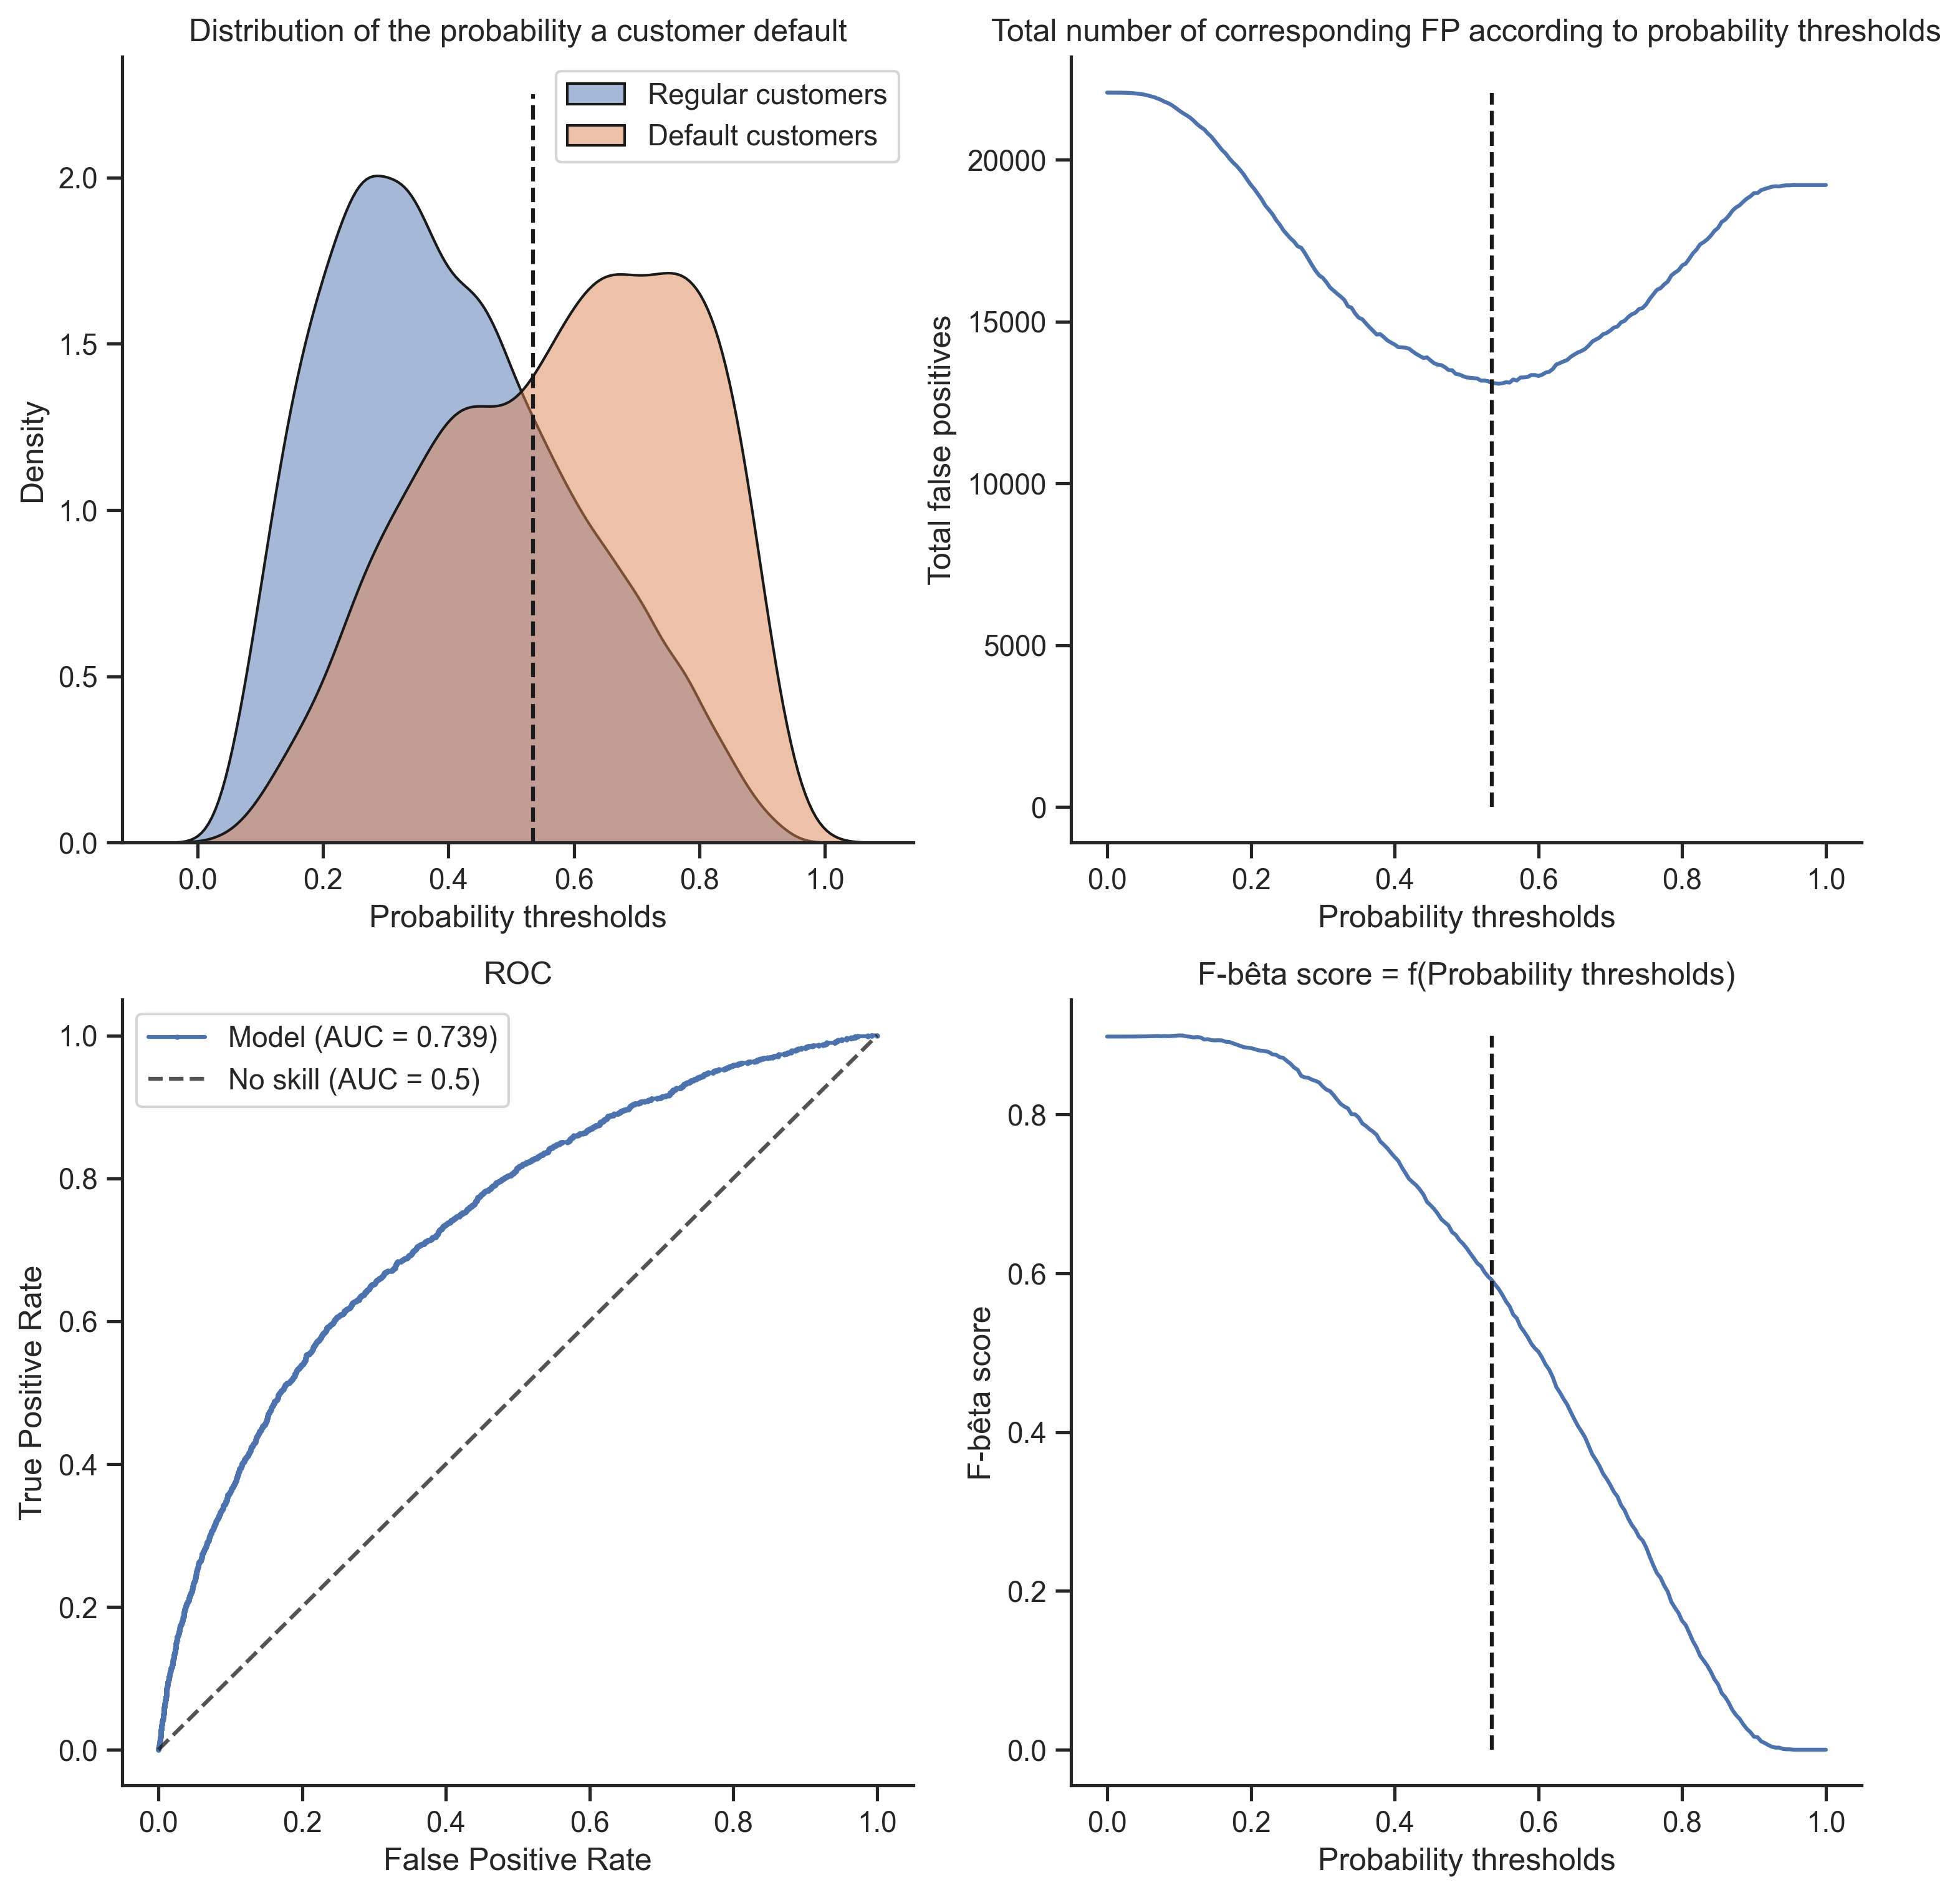

Confusion matrix:



----------------------------------------------------------------------------------------------------

Creating new entry...
Done!
The new informations have been saved in a new row.


Models   
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))  \
wt_logi_reg_clf_opt        (LogisticRegression(C=10.0, class_weight='bala...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
wt__scl_dummy_clf          (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(C=0.1, cla...   
wt_scl_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
wt_scl_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
wt_scl_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
resp_scl_dummy_clf         (MinMaxScaler(), SMOTE(random_state=0), DummyC...   
resp_scl_logi_reg_clf_opt  (MinMaxScaler(), SMOTE(k_neighbors=8, random_s...   

                                                                  yhat_train   
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt        [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt              [0.5402593881951335, 0.666153240733321, 0.2059...   
wt_xgb_clf_opt             [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt            [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf           [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
wt_scl_logi_reg_clf_opt    [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt          [0.41599445259826257, 0.6717023650467243, 0.21...   
wt_scl_xgb_clf_opt         [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt        [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
resp_scl_logi_reg_clf_opt  [0.6768077239116567, 0.704235189027842, 0.2504...   

                                                                   yhat_test   
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt        [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt              [0.47087781094224285, 0.633438976839338, 0.209...   
wt_xgb_clf_opt             [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt            [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_logi_reg_clf_opt    [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt          [0.5270956500020593, 0.6646669472798391, 0.163...   
wt_scl_xgb_clf_opt         [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt        [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf         [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...   
resp_scl_logi_reg_clf_opt                                                NaN   

                           Best_proba_threshold_train   
Model_labels                                            
wt_dummy_clf                                    0.000  \
wt_logi_reg_clf_opt                             0.480   
wt_rf_clf_opt                                   0.360   
wt_xgb_clf_opt                                  0.450   
wt_lgbm_clf_opt                                 0.455   
wt__scl_dummy_clf                               1.000   
wt_scl_dumm

In [65]:
#### iv. Evaluation on the cross validated train data# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                           eval_dataset = 'valid_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

#### v. Generalization over the test set


ROC-AUC = 0.738859
F-Bêta score of the optimal threshold found = 0.592
Highest F-Bêta score = 0.899
Job score: 0.683

----------------------------------------------------------------------------------------------------



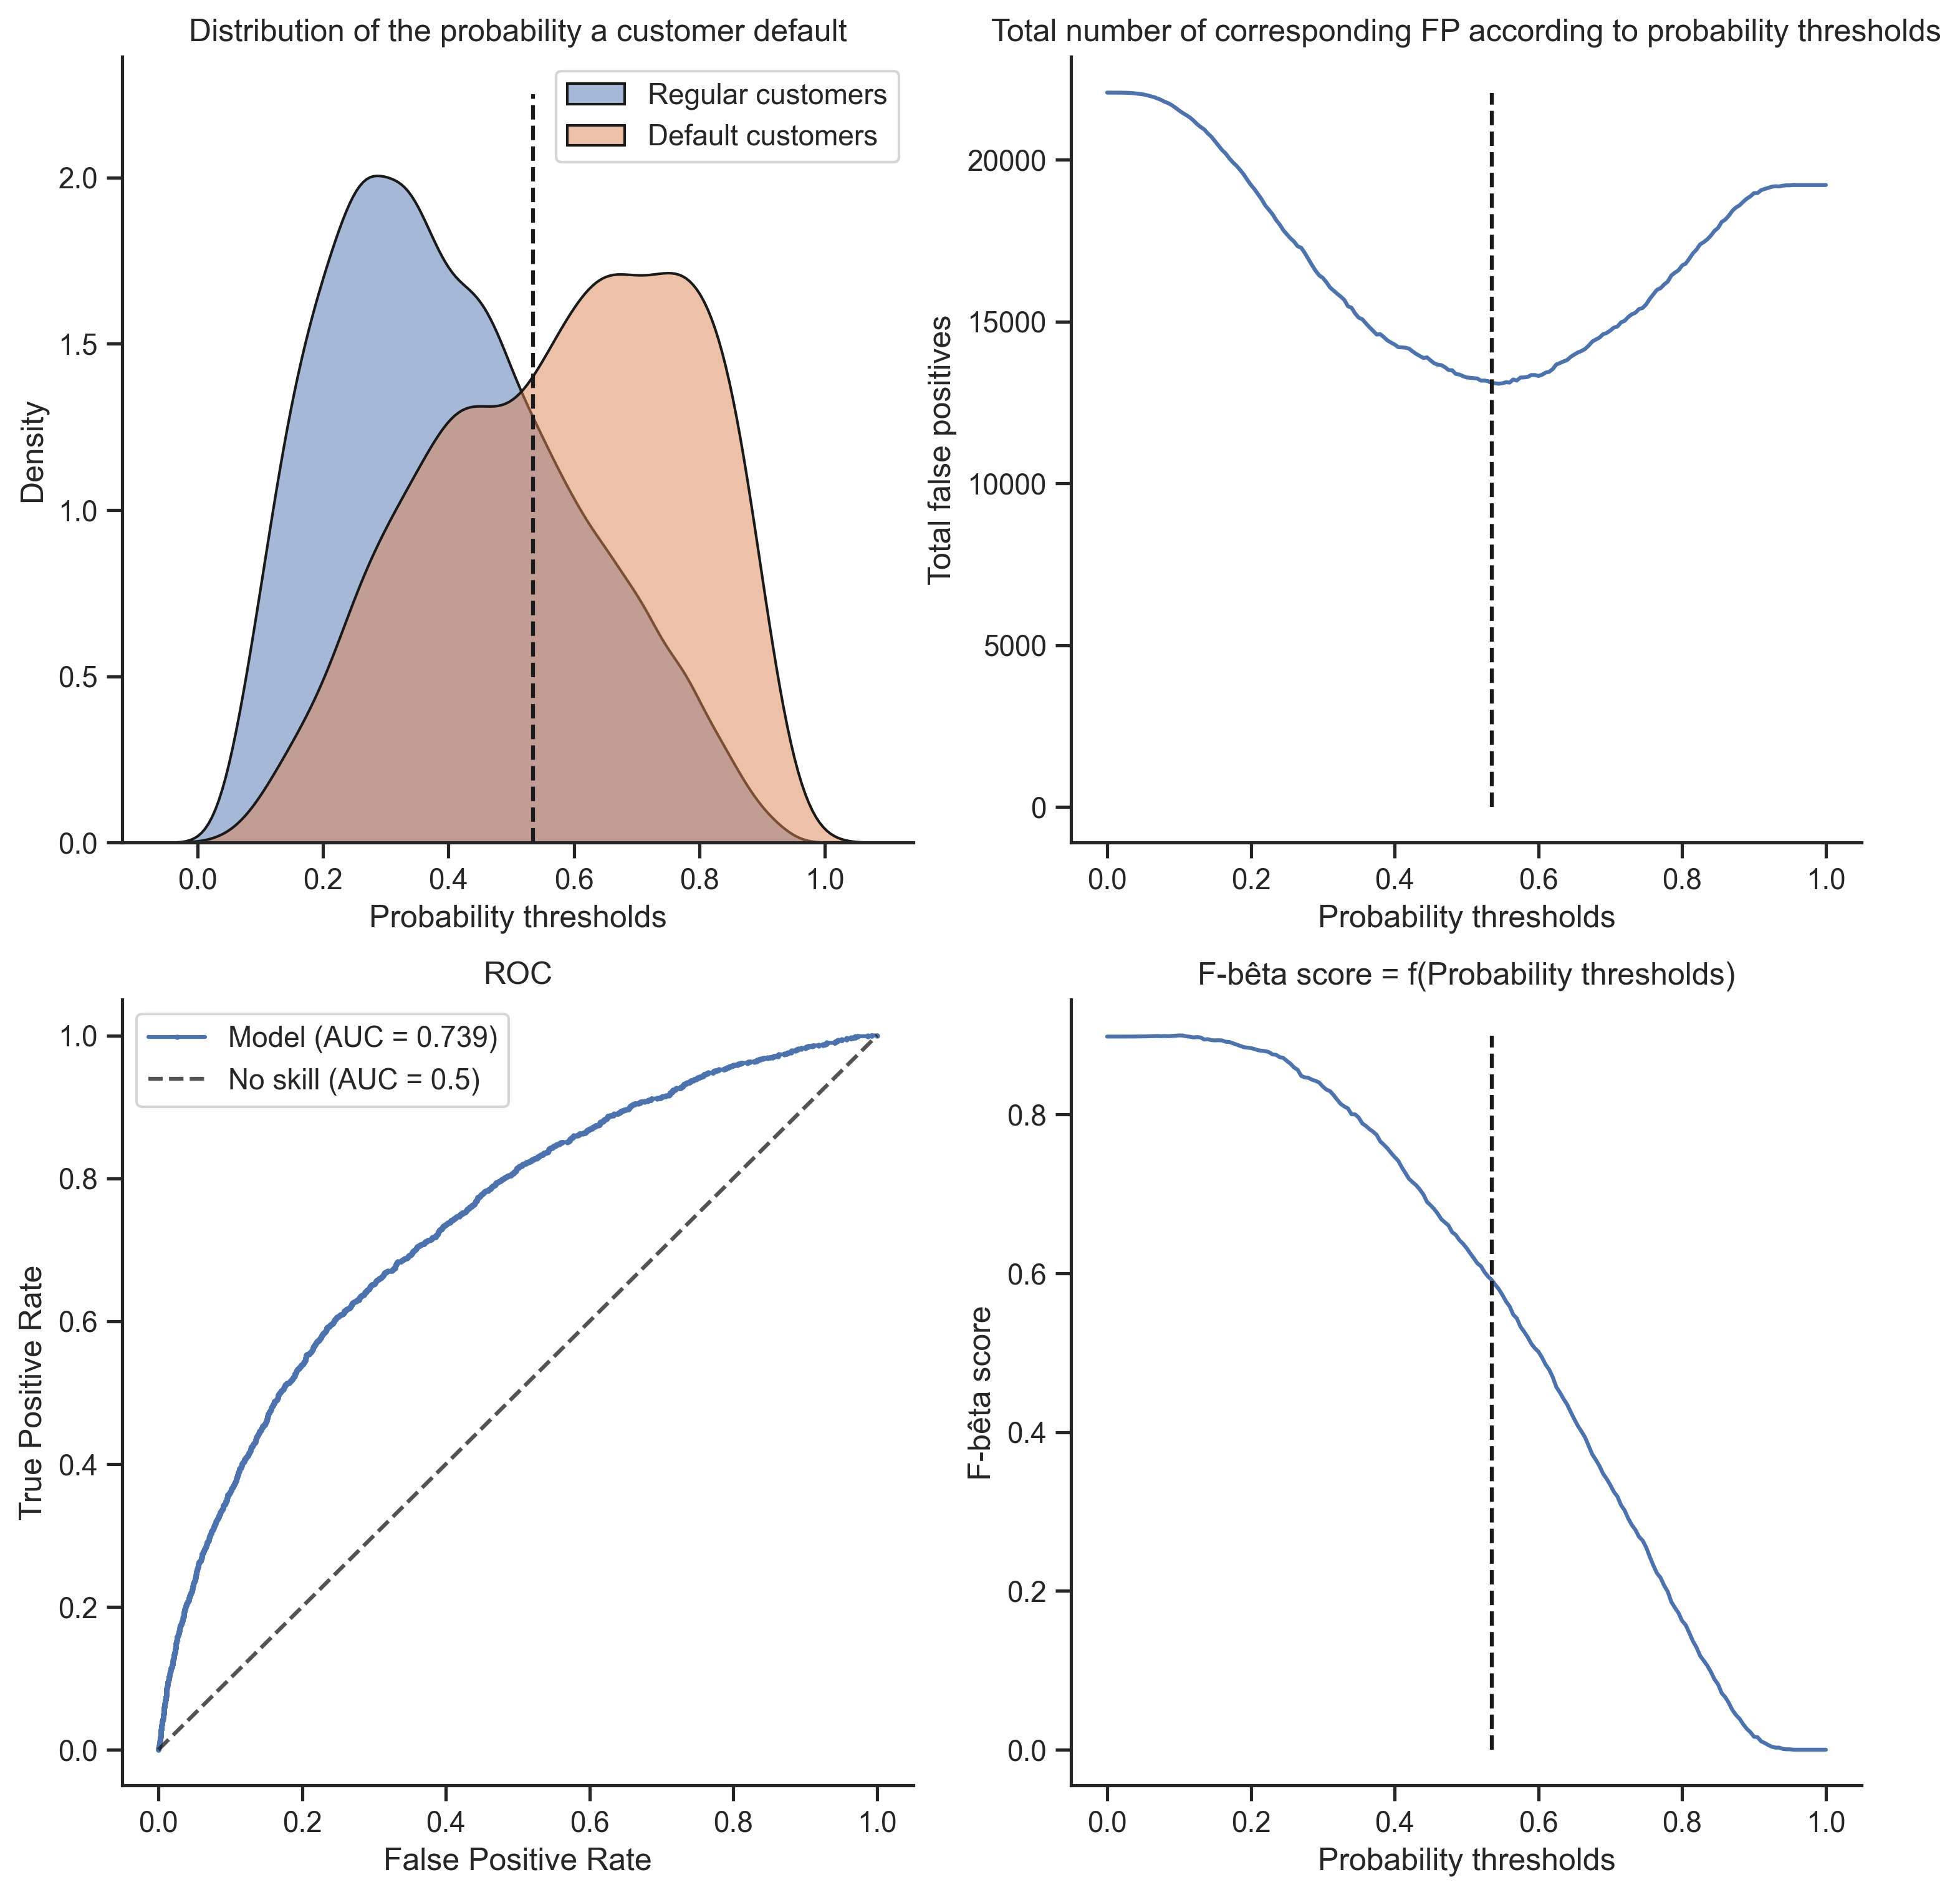

Confusion matrix:



----------------------------------------------------------------------------------------------------

Updating entry...
Done!
The row have been updated.


Models   
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))  \
wt_logi_reg_clf_opt        (LogisticRegression(C=10.0, class_weight='bala...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
wt__scl_dummy_clf          (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(C=0.1, cla...   
wt_scl_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
wt_scl_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
wt_scl_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
resp_scl_dummy_clf         (MinMaxScaler(), SMOTE(random_state=0), DummyC...   
resp_scl_logi_reg_clf_opt  (MinMaxScaler(), SMOTE(k_neighbors=8, random_s...   

                                                                  yhat_train   
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt        [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt              [0.5402593881951335, 0.666153240733321, 0.2059...   
wt_xgb_clf_opt             [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt            [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf           [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
wt_scl_logi_reg_clf_opt    [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt          [0.41599445259826257, 0.6717023650467243, 0.21...   
wt_scl_xgb_clf_opt         [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt        [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
resp_scl_logi_reg_clf_opt  [0.6768077239116567, 0.704235189027842, 0.2504...   

                                                                   yhat_test   
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt        [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt              [0.47087781094224285, 0.633438976839338, 0.209...   
wt_xgb_clf_opt             [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt            [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_logi_reg_clf_opt    [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt          [0.5270956500020593, 0.6646669472798391, 0.163...   
wt_scl_xgb_clf_opt         [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt        [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf         [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...   
resp_scl_logi_reg_clf_opt  [0.6768077239116567, 0.704235189027842, 0.2504...   

                           Best_proba_threshold_train   
Model_labels                                            
wt_dummy_clf                                    0.000  \
wt_logi_reg_clf_opt                             0.480   
wt_rf_clf_opt                                   0.360   
wt_xgb_clf_opt                                  0.450   
wt_lgbm_clf_opt                                 0.455   
wt__scl_dummy_clf                               1.000   
wt_scl_dumm

In [66]:
# Evaluate the model over the test set and store the results within the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TEST, y = y_TEST, cv = SKF_5,
                           eval_dataset = 'test_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

### c) Random forest

#### i. Importation

In [67]:
from sklearn.ensemble import RandomForestClassifier

#### ii. Creation of the model pipeline

In [68]:
# Initiliaze the model with its default values.
model = RandomForestClassifier()

# Add a scaler to transform data prior modelisation.
scaler = SCALER

# Imbalance process management method.
imb_process = IMB_PROCESS

# Set the label of the model according to the way imbalaced data is managed.
model_label = select_model_label(imb_process, 'rf_clf_opt')

# Build the model or the pipeline with its default values.
# NB: scaler = MinMaxScaler() as binary categories won't be changed and
#     the distance between all other values of a feature will be kept.
model_pl = set_model_pipeline(model, scaler, imb_process)

# Check the pipeline.
model_pl

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['resampler', SMOTE(random_state=0)],
                ['model', RandomForestClassifier()]])

#### iii. Hyperparameters tuning

In [69]:
# Get the list of the model's hyperparameters.
pprint(model_pl.get_params(), compact=True)

{'memory': None,
 'model': RandomForestClassifier(),
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False,
 'resampler': SMOTE(random_state=0),
 'resampler__k_neighbors': 5,
 'resampler__n_jobs': None,
 'resampler__random_state': 0,
 'resampler__sampling_strategy': 'auto',
 'scaler': MinMaxScaler(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'steps': [('scaler', MinMaxScaler()), ['resampler', SMOTE(random_state=0)],
           ['model', RandomForestClassifier()]],
 'verbose'

In [70]:
### Hyperparameters tuning range setting ###

# Number of trees in the random forest.
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 50, num = 51)]

# Maximum number of levels in each tree.
max_depth = [int(x) for x in np.linspace(1, 100, num = 11)]

# Minimum number of samples required to split a node.
min_samples_split = [int(x) for x in np.linspace(1, 100, num = 11)]

# Use or don't bootstrap samples.
#bootstrap = [True, False]

# Number of features to consider at every split.
max_features = [None, 'auto', 'sqrt', 'log2']


### Building of the hyperparameters' dictionary ###

# Add the classifier's hyperparameters to tune.
hyperparams_grid = {'model__n_estimators': n_estimators,
                    'model__max_depth': max_depth,
                    'model__min_samples_split': min_samples_split,
                    #'model__bootstrap': bootstrap,
                    'model__max_features': max_features,
                   }


### Add and/or set additional contextual hyperparameters if required ###

# Add SMOTE hyperparameters in the case of data resampling.
if imb_process == 'Resp':
    hyperparams_grid.update(SMOTE_GRID)

# Add a weight hyperparameter for the imbalanced data.
elif imb_process == 'Weight':
    model_pl['model'].set_params(class_weight='balanced')


### Check the results ###    

# Show the hyperparameters list and their associated range of values to try.
print("Hyperameters tuning ranges:")
pprint(hyperparams_grid, compact=True)

print()

# Show the pipeline models' default hyperparmeters' values.
print("Default values of the model's hyperparameters:")
pprint(model_pl)

Hyperameters tuning ranges:
{'model__max_depth': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'model__max_features': [None, 'auto', 'sqrt', 'log2'],
 'model__min_samples_split': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'model__n_estimators': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                         30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
                         44, 45, 46, 47, 48, 49, 50],
 'resampler__k_neighbors': [3, 4, 6, 8, 10],
 'resampler__sampling_strategy': [0.2, 0.4, 0.6, 0.8, 1.0]}

Default values of the model's hyperparameters:
Pipeline(steps=[('scaler', MinMaxScaler()),
                ['resampler', SMOTE(random_state=0)],
                ['model', RandomForestClassifier()]])


In [71]:
# Hyperparameters tuning.
model_pl_opt = block_hyperparams_tune(df=df_MODELS, X=X_TRAIN, y=y_TRAIN, cv=SKF_5, tune=HT,
                                      n_iter=20, grid_loop=1, range_precision=None, rand_state=0, verbose=2)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best estimator found:
 Pipeline(steps=[('scaler', MinMaxScaler()),
                ('resampler',
                 SMOTE(k_neighbors=6, random_state=0, sampling_strategy=1.0)),
                ['model',
                 RandomForestClassifier(max_depth=60, min_samples_split=70,
                                        n_estimators=39)]])

Best score found:
 score = 0.599

Best hyperparameters found:
 {'model__max_depth': 60, 'model__max_features': 'sqrt', 'model__min_samples_split': 70, 'model__n_estimators': 39, 'resampler__k_neighbors': 6, 'resampler__sampling_strategy': 1.0}


#### iv. Evaluation on the cross validated train data


ROC-AUC = 0.708717
F-Bêta score of the optimal threshold found = 0.600
Highest F-Bêta score = 0.898
Job score: 0.662

----------------------------------------------------------------------------------------------------



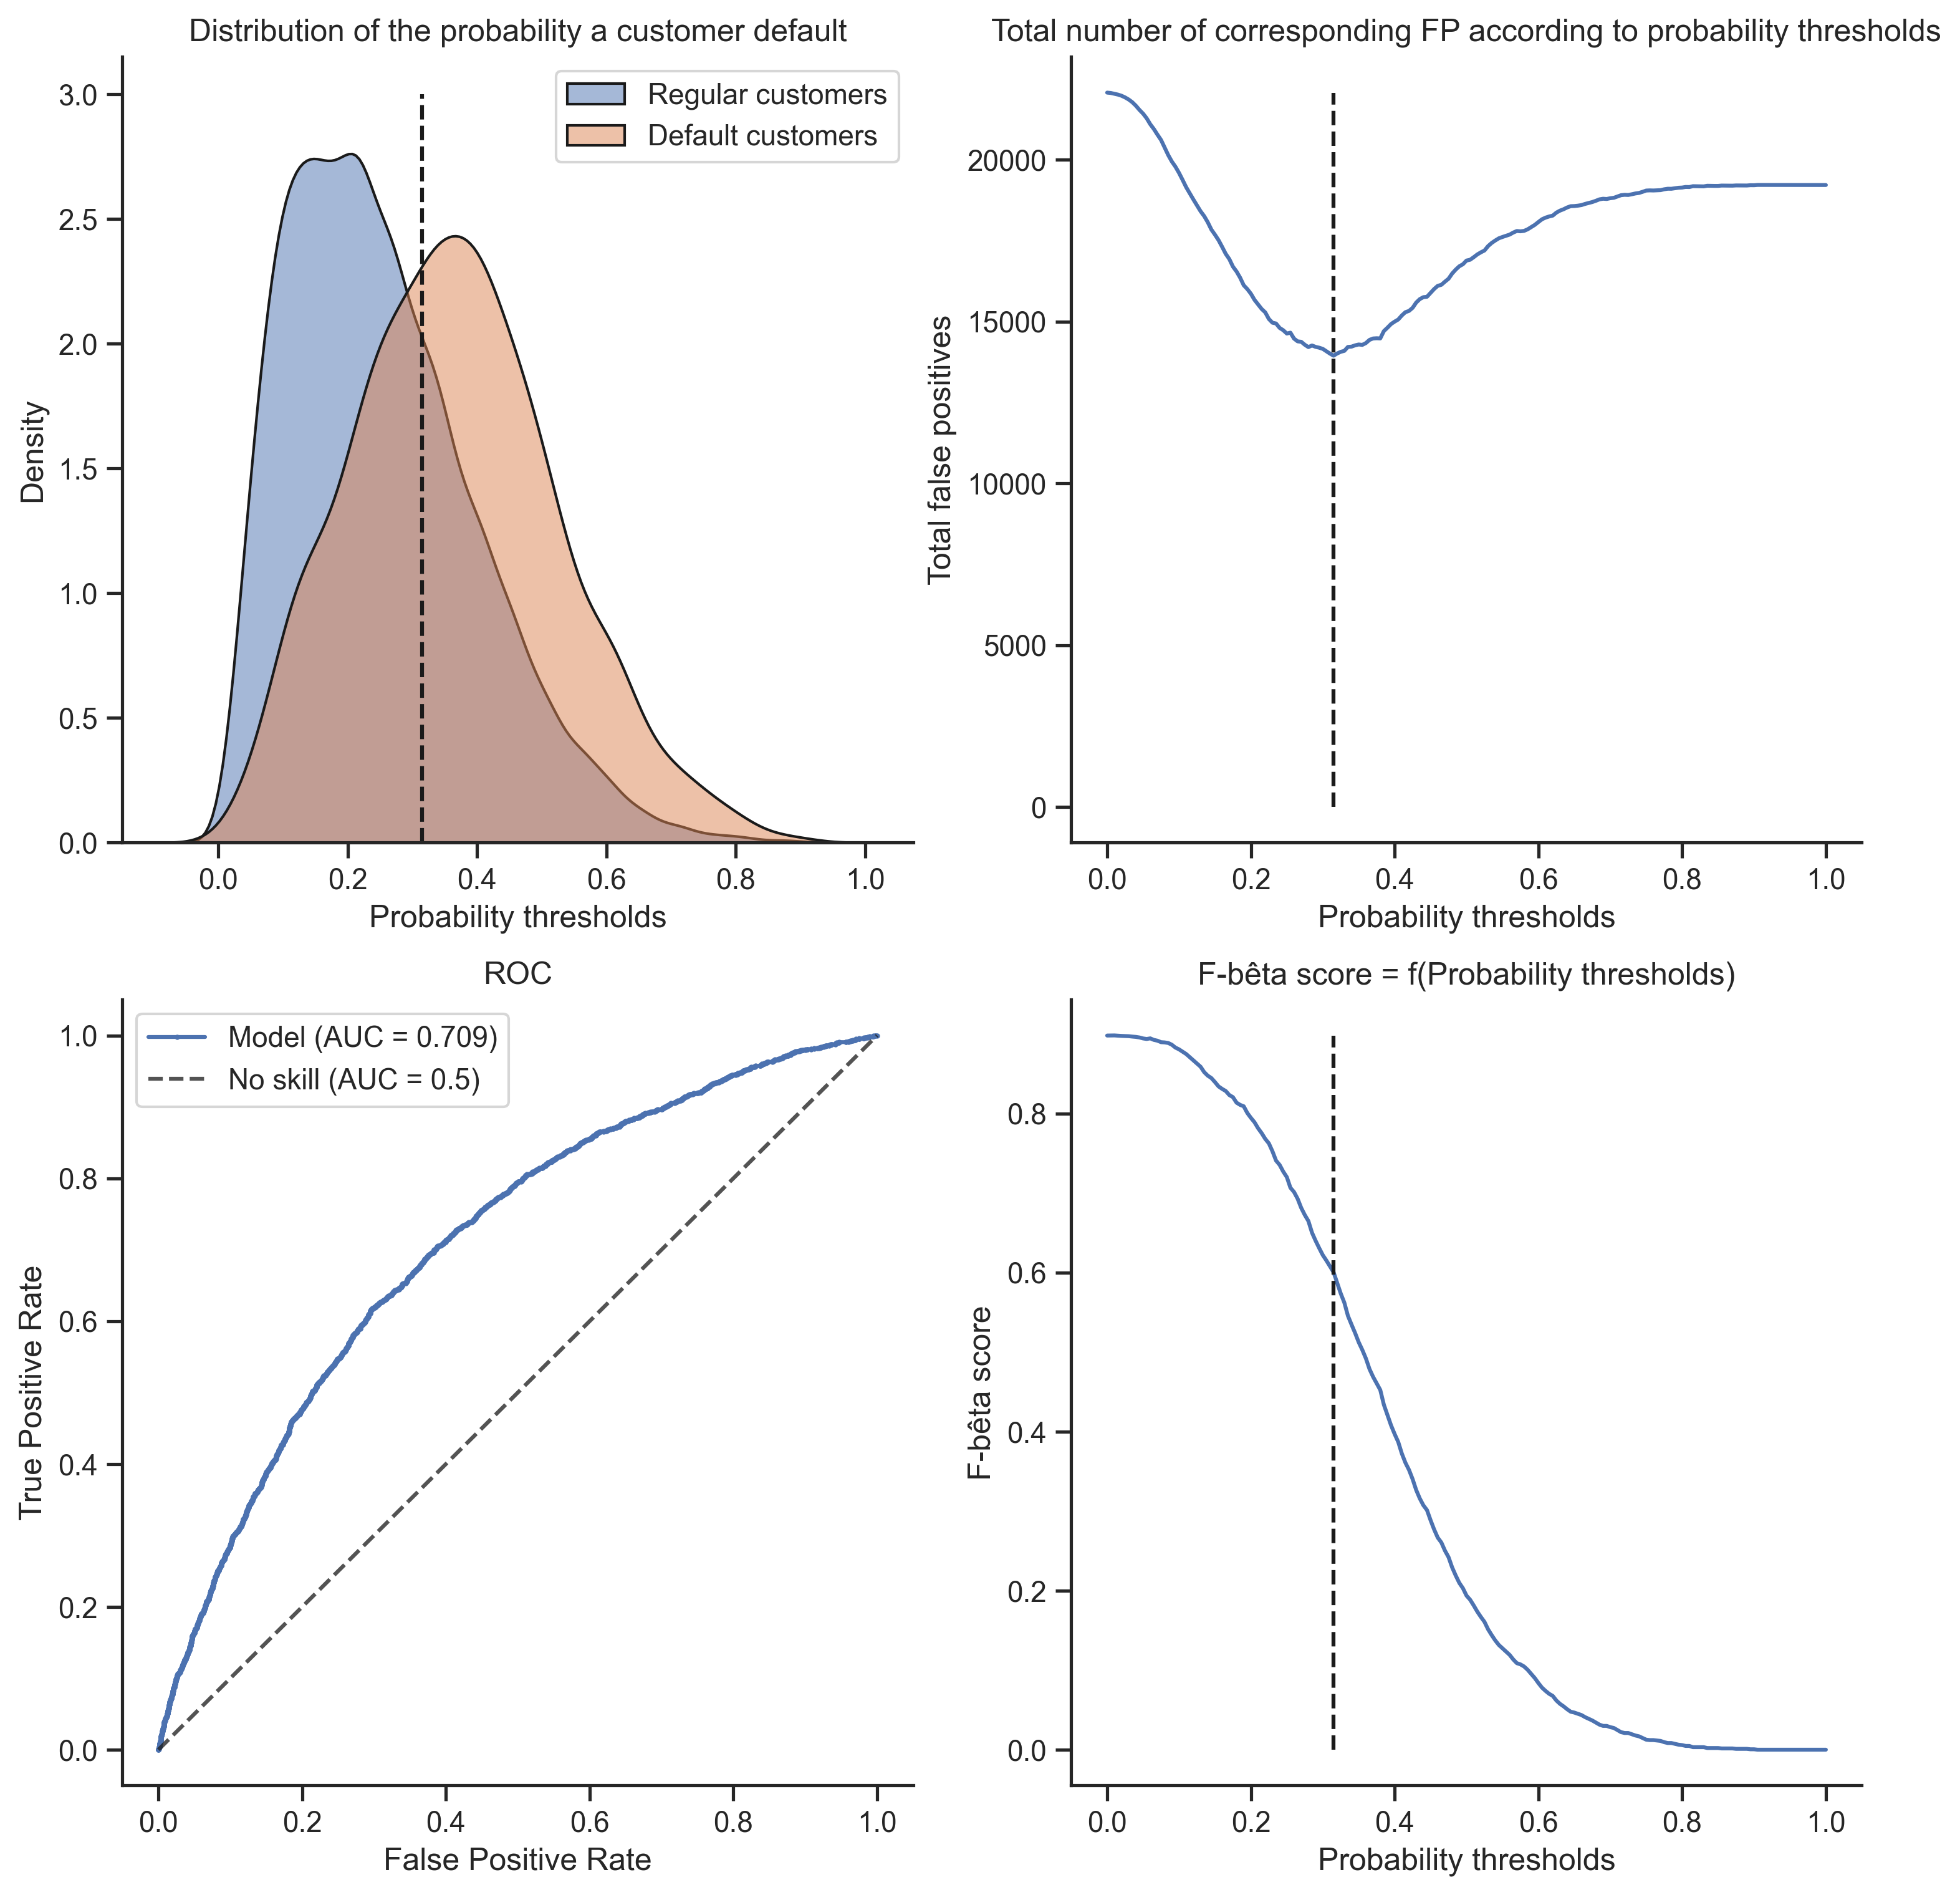

Confusion matrix:



----------------------------------------------------------------------------------------------------

Creating new entry...
Done!
The new informations have been saved in a new row.


Models   
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))  \
wt_logi_reg_clf_opt        (LogisticRegression(C=10.0, class_weight='bala...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
wt__scl_dummy_clf          (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(C=0.1, cla...   
wt_scl_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
wt_scl_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
wt_scl_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
resp_scl_dummy_clf         (MinMaxScaler(), SMOTE(random_state=0), DummyC...   
resp_scl_logi_reg_clf_opt  (MinMaxScaler(), SMOTE(k_neighbors=8, random_s...   
resp_scl_rf_clf_opt        (MinMaxScaler(), SMOTE(k_neighbors=6, random_s...   

                                                                  yhat_train   
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt        [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt              [0.5402593881951335, 0.666153240733321, 0.2059...   
wt_xgb_clf_opt             [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt            [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf           [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
wt_scl_logi_reg_clf_opt    [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt          [0.41599445259826257, 0.6717023650467243, 0.21...   
wt_scl_xgb_clf_opt         [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt        [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
resp_scl_logi_reg_clf_opt  [0.6768077239116567, 0.704235189027842, 0.2504...   
resp_scl_rf_clf_opt        [0.44877952179094, 0.39214759594080456, 0.1033...   

                                                                   yhat_test   
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt        [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt              [0.47087781094224285, 0.633438976839338, 0.209...   
wt_xgb_clf_opt             [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt            [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_logi_reg_clf_opt    [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt          [0.5270956500020593, 0.6646669472798391, 0.163...   
wt_scl_xgb_clf_opt         [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt        [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf         [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...   
resp_scl_logi_reg_clf_opt  [0.6768077239116567, 0.704235189027842, 0.2504...   
resp_scl_rf_clf_opt                                                      NaN   

                           Best_proba_threshold_train   
Model_labels                                            
wt_dummy_clf                                    0.000  \
wt_logi_reg_clf_opt                             0.480   

In [72]:
# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                           eval_dataset = 'valid_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

#### v. Generalization over the test set


ROC-AUC = 0.708084
F-Bêta score of the optimal threshold found = 0.651
Highest F-Bêta score = 0.898
Job score: 0.658

----------------------------------------------------------------------------------------------------



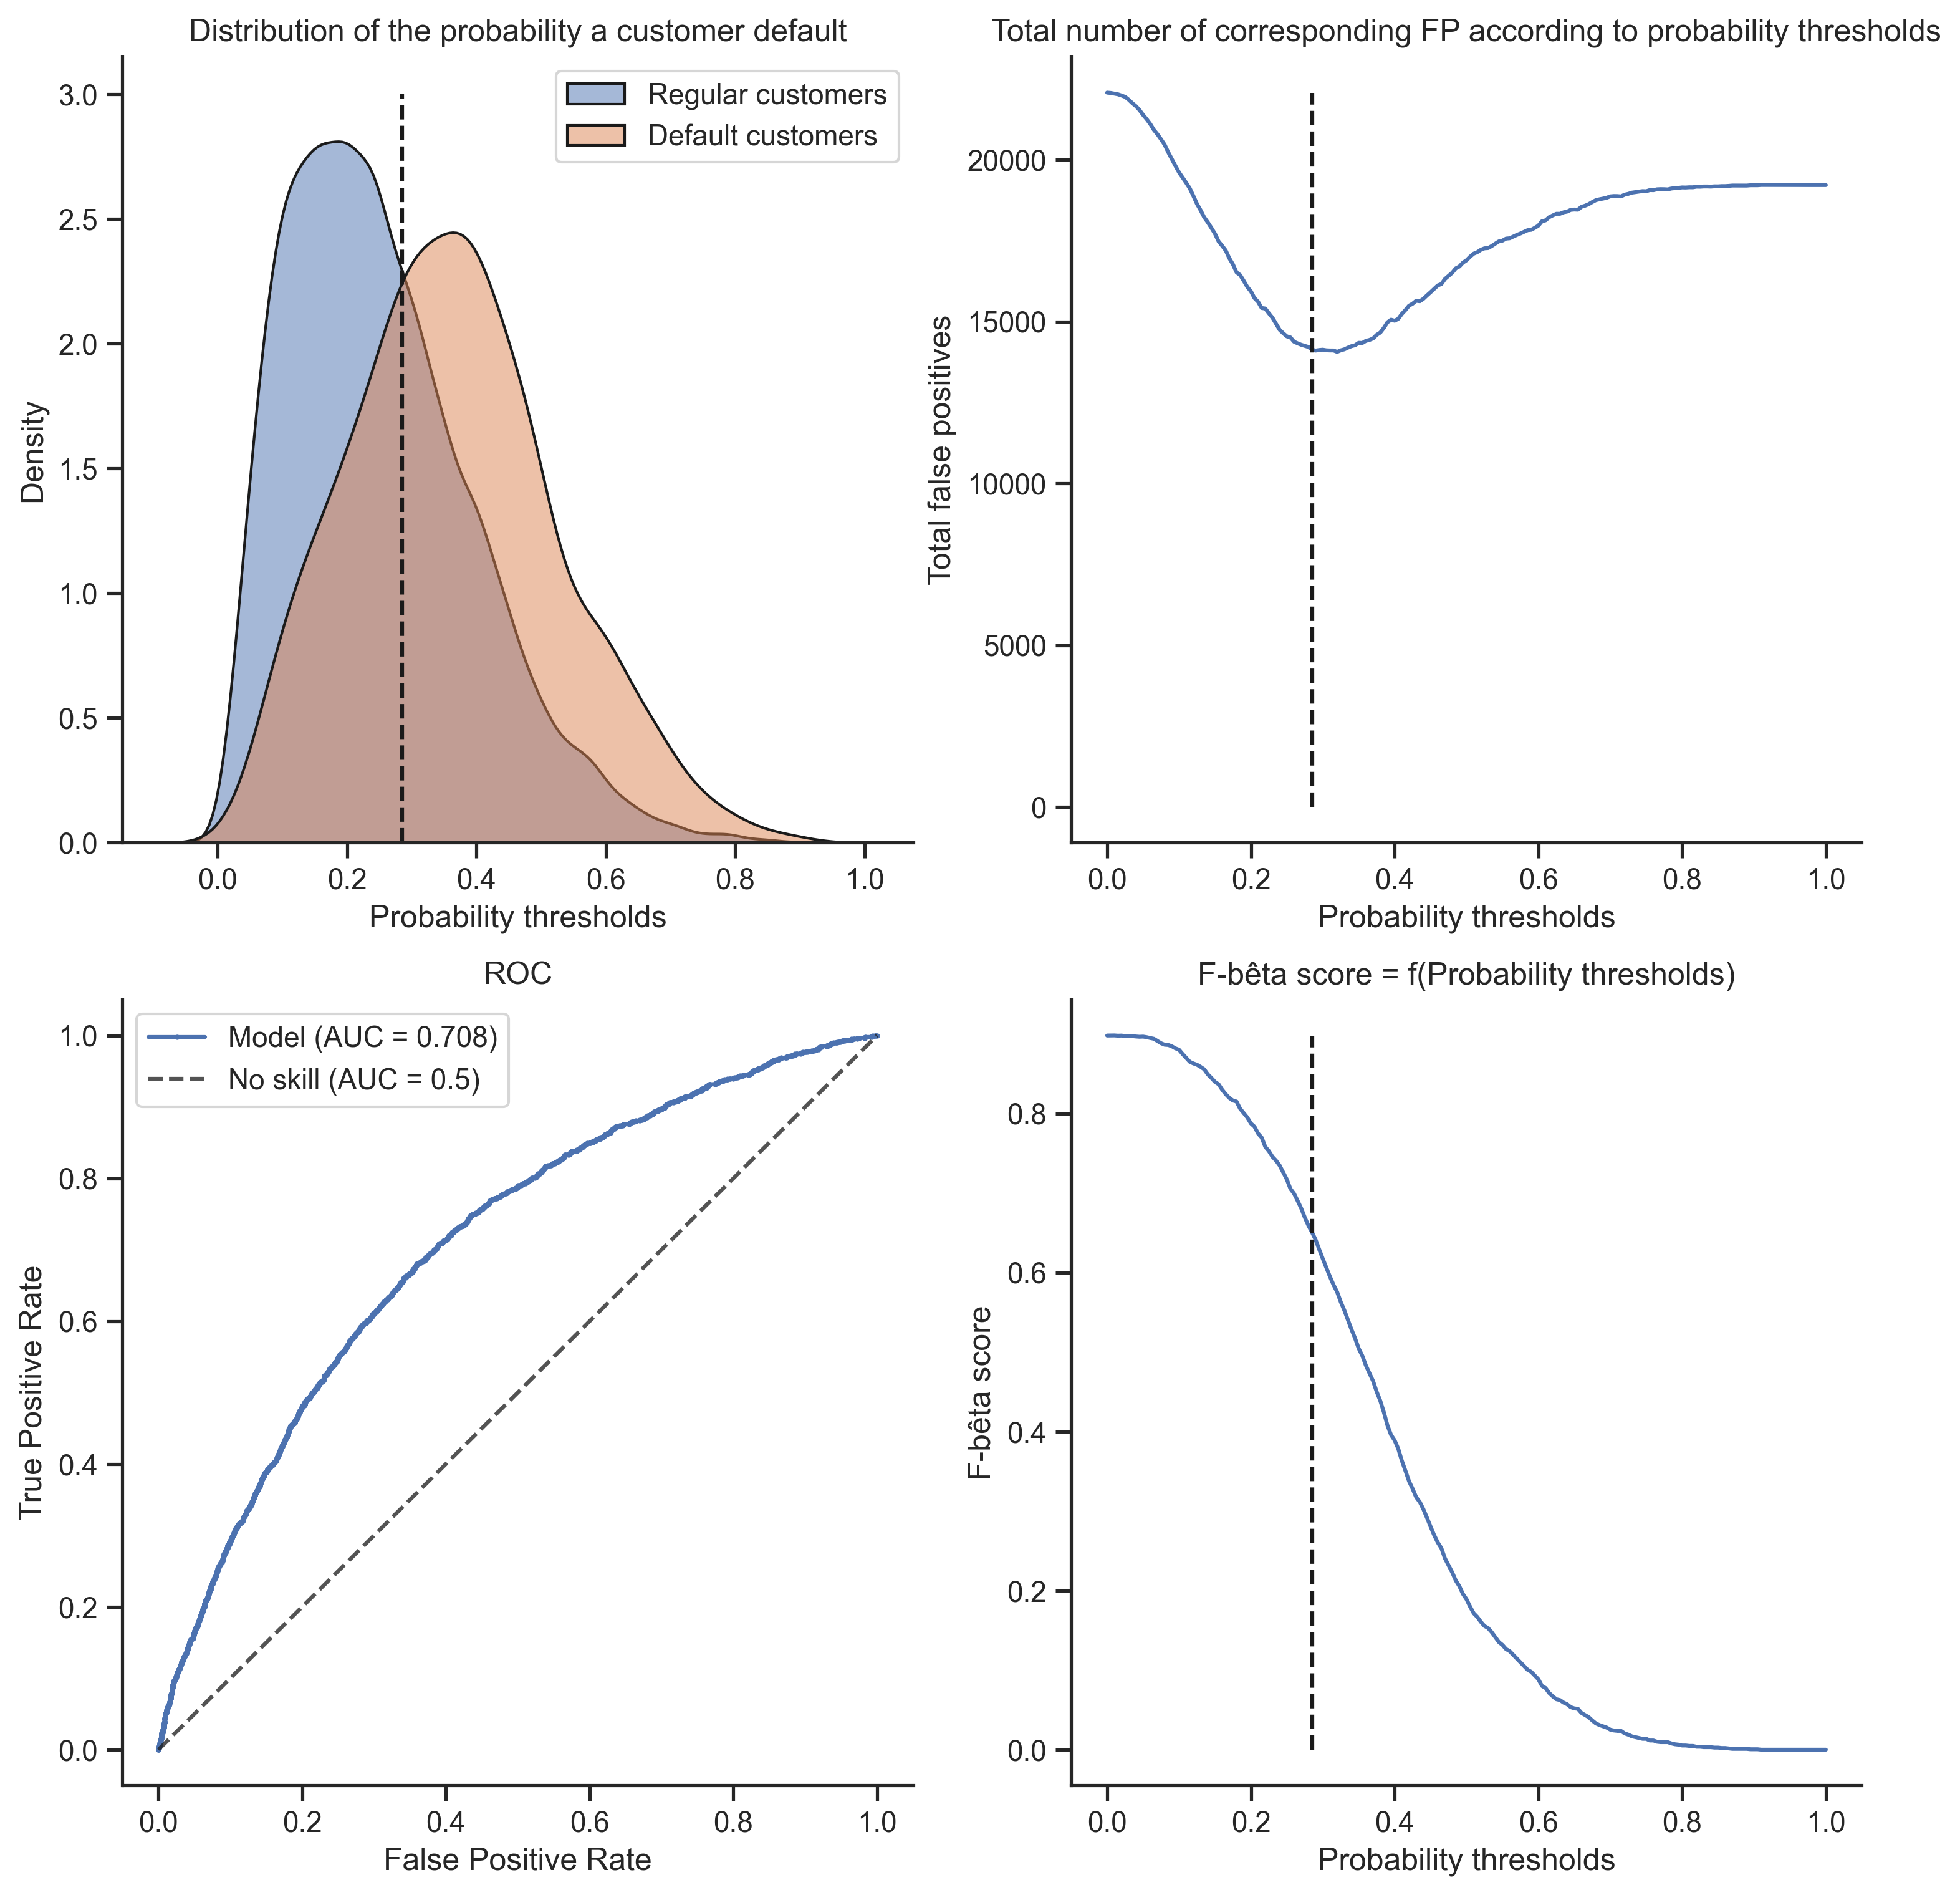

Confusion matrix:



----------------------------------------------------------------------------------------------------

Updating entry...
Done!
The row have been updated.


Models   
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))  \
wt_logi_reg_clf_opt        (LogisticRegression(C=10.0, class_weight='bala...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
wt__scl_dummy_clf          (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(C=0.1, cla...   
wt_scl_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
wt_scl_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
wt_scl_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
resp_scl_dummy_clf         (MinMaxScaler(), SMOTE(random_state=0), DummyC...   
resp_scl_logi_reg_clf_opt  (MinMaxScaler(), SMOTE(k_neighbors=8, random_s...   
resp_scl_rf_clf_opt        (MinMaxScaler(), SMOTE(k_neighbors=6, random_s...   

                                                                  yhat_train   
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt        [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt              [0.5402593881951335, 0.666153240733321, 0.2059...   
wt_xgb_clf_opt             [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt            [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf           [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
wt_scl_logi_reg_clf_opt    [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt          [0.41599445259826257, 0.6717023650467243, 0.21...   
wt_scl_xgb_clf_opt         [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt        [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
resp_scl_logi_reg_clf_opt  [0.6768077239116567, 0.704235189027842, 0.2504...   
resp_scl_rf_clf_opt        [0.44877952179094, 0.39214759594080456, 0.1033...   

                                                                   yhat_test   
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt        [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt              [0.47087781094224285, 0.633438976839338, 0.209...   
wt_xgb_clf_opt             [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt            [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_logi_reg_clf_opt    [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt          [0.5270956500020593, 0.6646669472798391, 0.163...   
wt_scl_xgb_clf_opt         [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt        [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf         [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...   
resp_scl_logi_reg_clf_opt  [0.6768077239116567, 0.704235189027842, 0.2504...   
resp_scl_rf_clf_opt        [0.39454662937532947, 0.31689920260394167, 0.0...   

                           Best_proba_threshold_train   
Model_labels                                            
wt_dummy_clf                                    0.000  \
wt_logi_reg_clf_opt                             0.480   

In [73]:
# Evaluate the model over the test set and store the results within the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TEST, y = y_TEST, cv = SKF_5,
                           eval_dataset = 'test_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

### d) XGBoosting

#### i. Importation

In [74]:
import xgboost as xgb
from xgboost import XGBClassifier

print('XGBoost version:', xgb.__version__)

XGBoost version: 1.7.5


#### ii. Creation of the model pipeline

In [75]:
# Initiliaze the model with its default values.
model = XGBClassifier(objective='binary:logistic', seed=0)

# Add a scaler to transform data prior modelisation.
scaler = SCALER

# Imbalance process management method.
imb_process = IMB_PROCESS

# Set the label of the model according to the way imbalaced data is managed.
model_label = select_model_label(imb_process, 'xgb_clf_opt')

# Build the model or the pipeline with its default values.
# NB: scaler = MinMaxScaler() as binary categories won't be changed and
#     the distance between all other values of a feature will be kept.
model_pl = set_model_pipeline(model, scaler, imb_process)

# Check the pipeline.
model_pl

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['resampler', SMOTE(random_state=0)],
                ['model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...)]])

#### iii. Hyperparameters tuning

In [76]:
# Get the list of the model's hyperparameters.
pprint(model_pl.get_params(), compact=True)

{'memory': None,
 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 'model__base_score': None,
 'model__booster': None,
 'model__callbacks': None,
 'model__colsample_bylevel': None,
 'model__colsample_bynode': None,
 'model__colsample_bytree': None,
 'model__early_stopping_rounds': None

In [77]:
### Get the optimal number of trees thanks to early stopping ###

# Set the number of runs to perform.
n_es_loop = 5

# Set the xgboost evaluation metric for the early stopping.
# NB: if more than one evaluation metric are given the last one is used for early stopping
model.set_params(eval_metric='auc')

# Run the set amount of loops to get the most promising range of number of trees to get.
verbose = 0
l_n_iters = []
l_scores = []
l_n_trees = []
count = 0
for count in range(n_es_loop):
    model.fit(X_TRAIN, y_TRAIN, early_stopping_rounds=50, eval_set=[(X_TEST, y_TEST)], verbose=verbose)
    l_scores.append(model.best_score)
    l_n_iters.append(model.best_iteration)
    l_n_trees.append(model.best_ntree_limit)
    if verbose != 0:
        print()

# Show the results.    
print("Averages gotten on {0} loops. \
      \n Average score: {1}\n Average number of iterations: {2}\n Average number of trees: {3}".\
      format(n_es_loop, np.mean(l_scores), np.mean(l_n_iters), np.mean(l_n_trees)))

Averages gotten on 5 loops.       
 Average score: 0.7162284873188406
 Average number of iterations: 16.0
 Average number of trees: 17.0


Finally, it appears that the optimal number of estimators depends too much on the other hyperparameters.<br>
=> The value is not set as default and will also by used in the searchCV.

In [78]:
### Hyperparameters tuning range setting ###

# 1. Forest's hyperparameters.

# Learning rate.
eta = [round(x, 2) for x in np.linspace(start=0.02, stop=0.3, num=15)]
#learning_rate = [x for x in np.logspace(-4, 0, 5)], # default 0.1 

# Number of trees in the random forest.
n_estimators = [int(x) for x in np.linspace(2, 50, 25)]


# 2. Tree's hyperparameters.

# Maximum number of levels in each tree.
max_depth = [int(x) for x in np.linspace(1, 100, 11)]

# Defines the minimum sum of weights of all observations required in a child.
min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]

# Specify the minimum loss reduction required to make a split.
gamma = [x for x in np.linspace(0, 0.2, 11)] #uniform(0, 0.5)

# Denotes the fraction of observations to be random samples for each tree.
subsample = [x for x in np.linspace(0.5, 1.0, 6)]

# Denotes the fraction of columns to be random samples for each tree.
colsample_bytree = [x for x in np.linspace(0.5, 1.0, 6)]


# 3. Regulators' hyperparameters.

# L2 regularization term on weights (analogous to Ridge regression).
lambda_regul = [x for x in np.logspace(-4, 0, 5)], # default 0.1

# L1 regularization term on weight (analogous to Lasso regression)
alpha_regul = [x for x in np.logspace(-4, 0, 5)], # default 0.1 


### Building of the hyperparameters' dictionary ###

# Add the classifier's hyperparameters to tune.
hyperparams_grid = {'model__eta': eta,
                    'model__n_estimators': n_estimators,
                    'model__max_depth': max_depth,
                    'model__min_child_weight': min_child_weight,
                    'model__gamma': gamma,
                    'model__subsample': subsample,
                    'model__colsample_bytree': colsample_bytree
                   }


### Add and/or set additional contextual hyperparameters if required ###

# Add SMOTE hyperparameters in the case of data resampling.
if imb_process == 'Resp':
    hyperparams_grid.update(SMOTE_GRID)

# Add a weight hyperparameter for the imbalanced data.
elif imb_process == 'Weight':
    model_pl['model'].set_params(scale_pos_weight=9) # NB: scale_pos_weight = TN / TP


### Check the results ###    

# Show the hyperparameters list and their associated range of values to try.
print("Hyperameters tuning ranges:")
pprint(hyperparams_grid, compact=True)

print()

# Show the pipeline models' default hyperparmeters' values.
print("Default values of the model's hyperparameters:")
pprint(model_pl)

Hyperameters tuning ranges:
{'model__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 'model__eta': [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22,
                0.24, 0.26, 0.28, 0.3],
 'model__gamma': [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18,
                  0.2],
 'model__max_depth': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'model__min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'model__n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,
                         32, 34, 36, 38, 40, 42, 44, 46, 48, 50],
 'model__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 'resampler__k_neighbors': [3, 4, 6, 8, 10],
 'resampler__sampling_strategy': [0.2, 0.4, 0.6, 0.8, 1.0]}

Default values of the model's hyperparameters:
Pipeline(steps=[('scaler', MinMaxScaler()),
                ['resampler', SMOTE(random_state=0)],
                ['model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
         

In [79]:
# Hyperparameters tuning.
model_pl_opt = block_hyperparams_tune(df=df_MODELS, X=X_TRAIN, y=y_TRAIN, cv=SKF_5, tune=HT,
                                      n_iter=20, grid_loop=1, range_precision=None, rand_state=0, verbose=2)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best estimator found:
 Pipeline(steps=[('scaler', MinMaxScaler()),
                ('resampler',
                 SMOTE(k_neighbors=10, random_state=0, sampling_strategy=0.8)),
                ['model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, early_stopping_rounds=None,
                               enable_categorical=False, eta=0.22,
                               eval_metric='auc', feature_types=None,
                               gamma=0.08, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                        

#### iv. Evaluation on the cross validated train data


ROC-AUC = 0.702758
F-Bêta score of the optimal threshold found = 0.653
Highest F-Bêta score = 0.898
Job score: 0.661

----------------------------------------------------------------------------------------------------



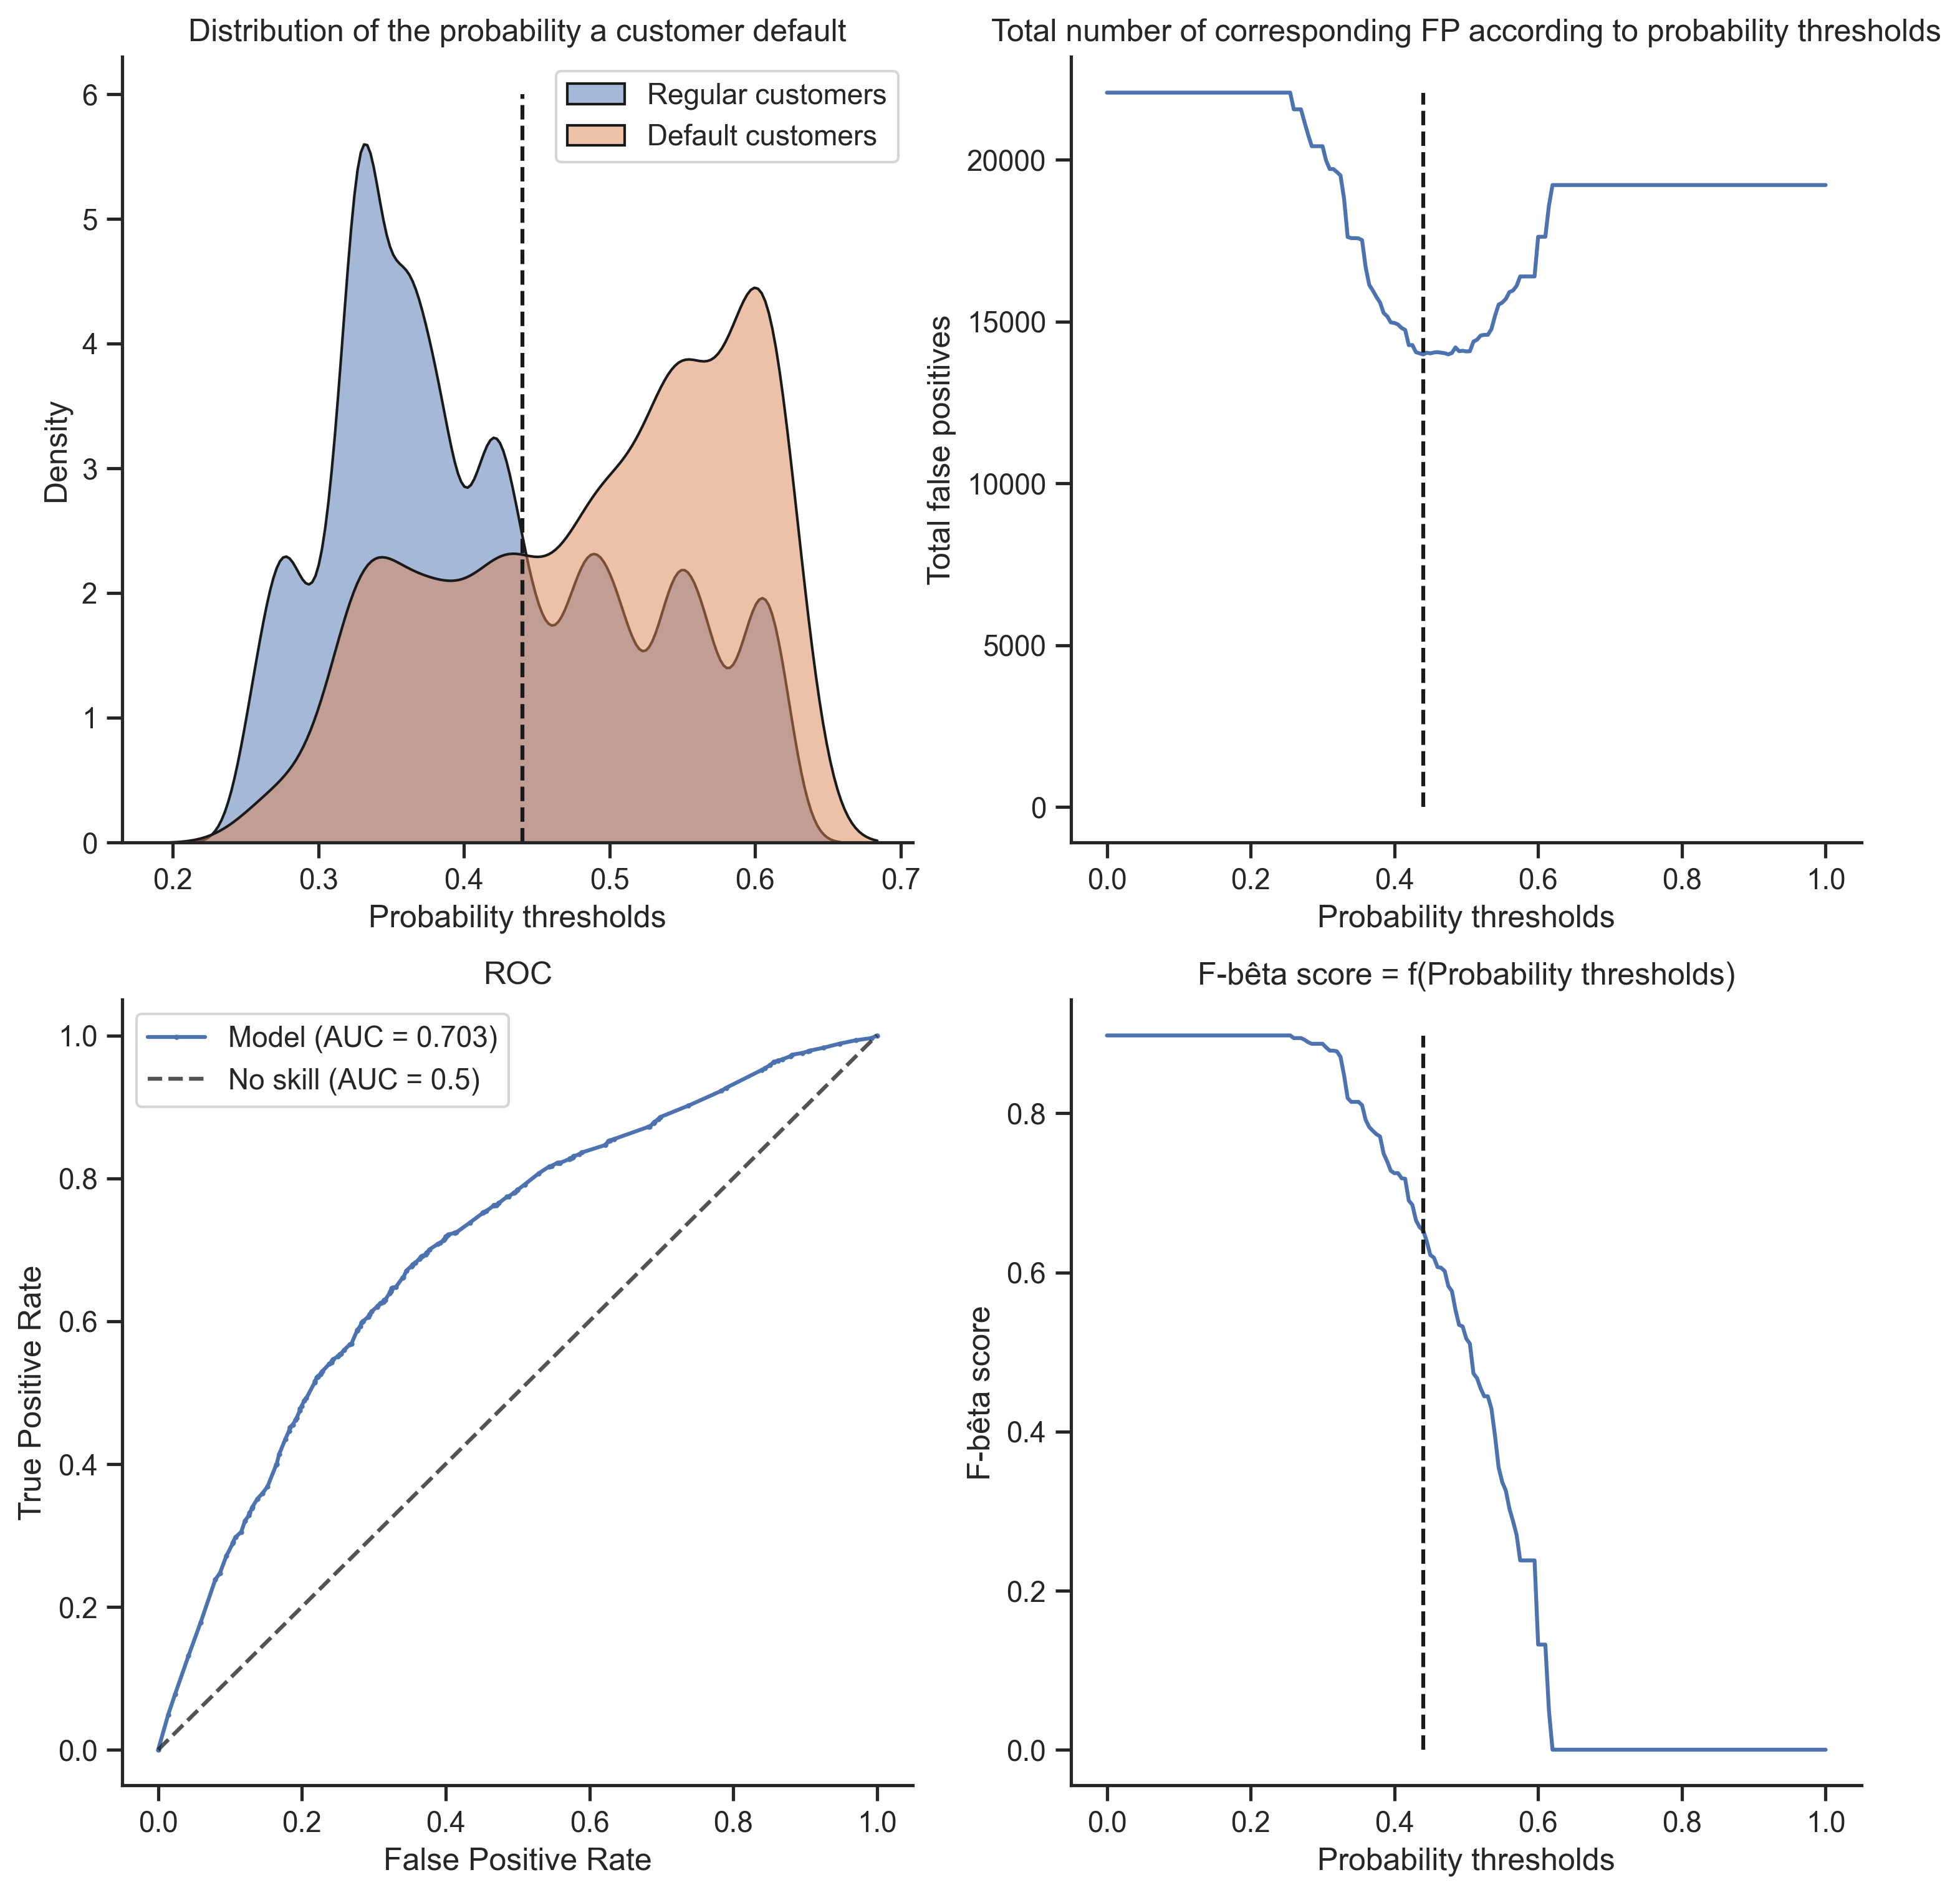

Confusion matrix:



----------------------------------------------------------------------------------------------------

Creating new entry...
Done!
The new informations have been saved in a new row.


Models   
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))  \
wt_logi_reg_clf_opt        (LogisticRegression(C=10.0, class_weight='bala...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
wt__scl_dummy_clf          (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(C=0.1, cla...   
wt_scl_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
wt_scl_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
wt_scl_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
resp_scl_dummy_clf         (MinMaxScaler(), SMOTE(random_state=0), DummyC...   
resp_scl_logi_reg_clf_opt  (MinMaxScaler(), SMOTE(k_neighbors=8, random_s...   
resp_scl_rf_clf_opt        (MinMaxScaler(), SMOTE(k_neighbors=6, random_s...   
resp_scl_xgb_clf_opt       (MinMaxScaler(), SMOTE(k_neighbors=10, random_...   

                                                                  yhat_train   
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt        [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt              [0.5402593881951335, 0.666153240733321, 0.2059...   
wt_xgb_clf_opt             [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt            [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf           [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
wt_scl_logi_reg_clf_opt    [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt          [0.41599445259826257, 0.6717023650467243, 0.21...   
wt_scl_xgb_clf_opt         [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt        [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
resp_scl_logi_reg_clf_opt  [0.6768077239116567, 0.704235189027842, 0.2504...   
resp_scl_rf_clf_opt        [0.44877952179094, 0.39214759594080456, 0.1033...   
resp_scl_xgb_clf_opt       [0.5393323, 0.5976353, 0.28226593, 0.43437245,...   

                                                                   yhat_test   
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt        [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt              [0.47087781094224285, 0.633438976839338, 0.209...   
wt_xgb_clf_opt             [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt            [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_logi_reg_clf_opt    [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt          [0.5270956500020593, 0.6646669472798391, 0.163...   
wt_scl_xgb_clf_opt         [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt        [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf         [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...   
resp_scl_logi_reg_clf_opt  [0.6768077239116567, 0.704235189027842, 0.2504...   
resp_scl_rf_clf_opt        [0.39454662937532947, 0.31689920260394167, 0.0...   
resp_scl_xgb_clf_opt                                                

In [80]:
# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                           eval_dataset = 'valid_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

#### v. Generalization over the test set


ROC-AUC = 0.702758
F-Bêta score of the optimal threshold found = 0.653
Highest F-Bêta score = 0.898
Job score: 0.661

----------------------------------------------------------------------------------------------------



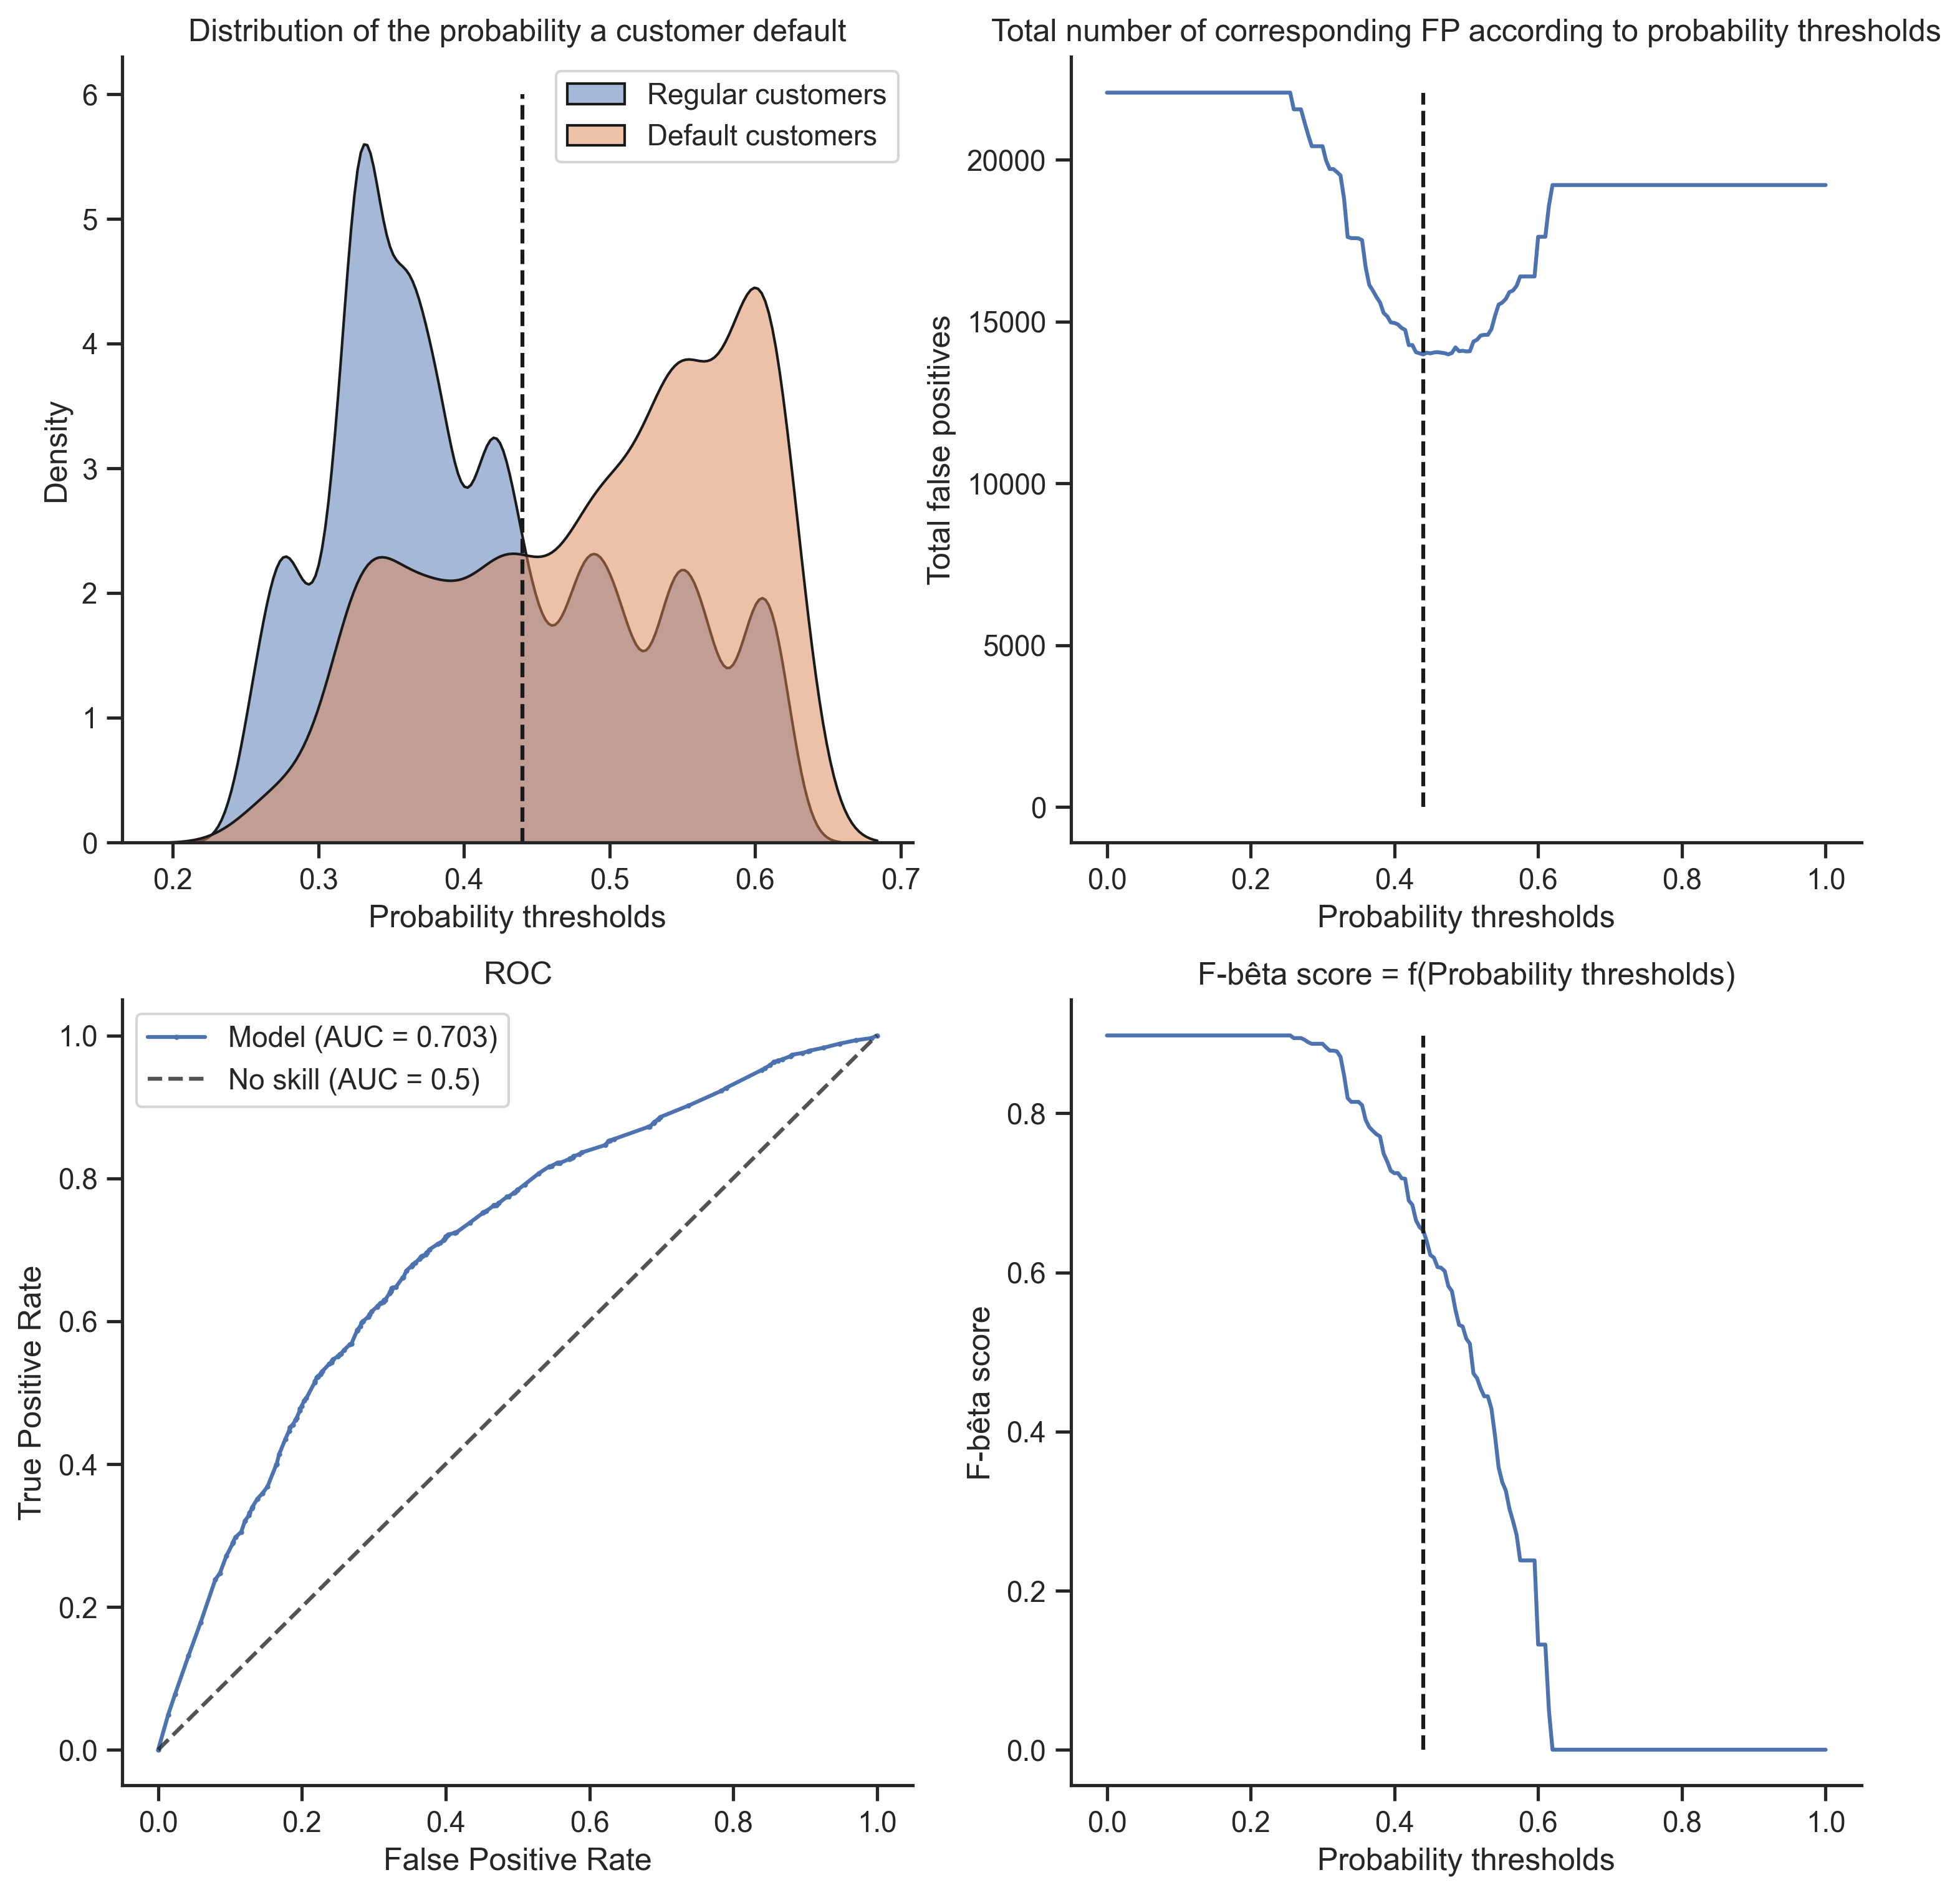

Confusion matrix:



----------------------------------------------------------------------------------------------------

Updating entry...
Done!
The row have been updated.


Models   
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))  \
wt_logi_reg_clf_opt        (LogisticRegression(C=10.0, class_weight='bala...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
wt__scl_dummy_clf          (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(C=0.1, cla...   
wt_scl_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
wt_scl_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
wt_scl_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
resp_scl_dummy_clf         (MinMaxScaler(), SMOTE(random_state=0), DummyC...   
resp_scl_logi_reg_clf_opt  (MinMaxScaler(), SMOTE(k_neighbors=8, random_s...   
resp_scl_rf_clf_opt        (MinMaxScaler(), SMOTE(k_neighbors=6, random_s...   
resp_scl_xgb_clf_opt       (MinMaxScaler(), SMOTE(k_neighbors=10, random_...   

                                                                  yhat_train   
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt        [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt              [0.5402593881951335, 0.666153240733321, 0.2059...   
wt_xgb_clf_opt             [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt            [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf           [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
wt_scl_logi_reg_clf_opt    [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt          [0.41599445259826257, 0.6717023650467243, 0.21...   
wt_scl_xgb_clf_opt         [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt        [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
resp_scl_logi_reg_clf_opt  [0.6768077239116567, 0.704235189027842, 0.2504...   
resp_scl_rf_clf_opt        [0.44877952179094, 0.39214759594080456, 0.1033...   
resp_scl_xgb_clf_opt       [0.5393323, 0.5976353, 0.28226593, 0.43437245,...   

                                                                   yhat_test   
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt        [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt              [0.47087781094224285, 0.633438976839338, 0.209...   
wt_xgb_clf_opt             [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt            [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_logi_reg_clf_opt    [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt          [0.5270956500020593, 0.6646669472798391, 0.163...   
wt_scl_xgb_clf_opt         [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt        [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf         [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...   
resp_scl_logi_reg_clf_opt  [0.6768077239116567, 0.704235189027842, 0.2504...   
resp_scl_rf_clf_opt        [0.39454662937532947, 0.31689920260394167, 0.0...   
resp_scl_xgb_clf_opt       [0.5393323, 0.5976353, 0.28226593, 0.4343

In [81]:
# Evaluate the model over the test set and store the results within the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TEST, y = y_TEST, cv = SKF_5,
                           eval_dataset = 'test_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

### e) LightGBM

#### i. Importation

In [82]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier

print('lightgbm version:', lgbm.__version__)

lightgbm version: 3.3.5


#### ii. Creation of the model pipeline

In [83]:
# Initiliaze the model with its default values.
model = LGBMClassifier(objective='binary', random_state=0)

# Add a scaler to transform data prior modelisation.
scaler = SCALER

# Imbalance process management method.
imb_process = IMB_PROCESS

# Set the label of the model according to the way imbalaced data is managed.
model_label = select_model_label(imb_process, 'lgbm_clf_opt')

# Build the model or the pipeline with its default values.
# NB: scaler = MinMaxScaler() as binary categories won't be changed and
#     the distance between all other values of a feature will be kept.
model_pl = set_model_pipeline(model, scaler, imb_process)

# Check the pipeline.
model_pl

Pipeline(steps=[('scaler', MinMaxScaler()),
                ['resampler', SMOTE(random_state=0)],
                ['model', LGBMClassifier(objective='binary', random_state=0)]])

#### iii. Hyperparameters tuning

In [84]:
# Get the list of the model's hyperparameters.
pprint(model_pl.get_params(), compact=True)

{'memory': None,
 'model': LGBMClassifier(objective='binary', random_state=0),
 'model__boosting_type': 'gbdt',
 'model__class_weight': None,
 'model__colsample_bytree': 1.0,
 'model__importance_type': 'split',
 'model__learning_rate': 0.1,
 'model__max_depth': -1,
 'model__min_child_samples': 20,
 'model__min_child_weight': 0.001,
 'model__min_split_gain': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': -1,
 'model__num_leaves': 31,
 'model__objective': 'binary',
 'model__random_state': 0,
 'model__reg_alpha': 0.0,
 'model__reg_lambda': 0.0,
 'model__silent': 'warn',
 'model__subsample': 1.0,
 'model__subsample_for_bin': 200000,
 'model__subsample_freq': 0,
 'resampler': SMOTE(random_state=0),
 'resampler__k_neighbors': 5,
 'resampler__n_jobs': None,
 'resampler__random_state': 0,
 'resampler__sampling_strategy': 'auto',
 'scaler': MinMaxScaler(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'steps': [('scaler', MinMaxScaler()), ['resampler', S

In [85]:
### Hyperparameters tuning range setting ###

# 1. Forest's hyperparameters.

# Learning rate.
learning_rate = [round(x, 2) for x in np.linspace(start=0.0, stop=0.3, num=16)]
#learning_rate = [x for x in np.logspace(-4, 0, 5)], # default 0.1 

# Number of trees in the random forest.
n_estimators = [int(x) for x in np.linspace(2, 50, 25)]


# 2. Tree's hyperparameters.

# Maximum number of levels in each tree.
max_depth = [int(x) for x in np.linspace(1, 100, 11)]

# Defines the minimum sum of weights of all observations required in a child.
min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]

# Specify the minimum loss reduction required to make a split.
#gamma = [x for x in np.linspace(0, 0.2, 11)] #uniform(0, 0.5)

# Denotes the fraction of observations to be random samples for each tree.
subsample = [x for x in np.linspace(0.5, 1.0, 6)]

# Denotes the fraction of columns to be random samples for each tree.
colsample_bytree = [x for x in np.linspace(0.5, 1.0, 6)]


# 3. Regulators' hyperparameters.

# L2 regularization term on weights (analogous to Ridge regression).
reg_lambda = [x for x in np.logspace(-4, 0, 5)] # default 0.1

# L1 regularization term on weight (analogous to Lasso regression)
reg_alpha = [x for x in np.logspace(-4, 0, 5)] # default 0.1 


### Building of the hyperparameters' dictionary ###

# Add the classifier's hyperparameters to tune.
hyperparams_grid = {'model__learning_rate': learning_rate,
                    'model__n_estimators': n_estimators,
                    'model__max_depth': max_depth,
                    'model__min_child_weight': min_child_weight,
                    #'model__gamma': gamma,
                    'model__subsample': subsample,
                    'model__colsample_bytree': colsample_bytree,
                    'model__reg_lambda': reg_lambda,
                    'model__reg_alpha': reg_alpha
                   }


### Add and/or set additional contextual hyperparameters if required ###

# Add SMOTE hyperparameters in the case of data resampling.
if imb_process == 'Resp':
    hyperparams_grid.update(SMOTE_GRID)

# Add a weight hyperparameter for the imbalanced data.
elif imb_process == 'Weight':
    model_pl['model'].set_params(class_weight='balanced')


### Check the results ###    

# Show the hyperparameters list and their associated range of values to try.
print("Hyperameters tuning ranges:")
pprint(hyperparams_grid, compact=True)

print()

# Show the pipeline models' default hyperparmeters' values.
print("Default values of the model's hyperparameters:")
pprint(model_pl)

Hyperameters tuning ranges:
{'model__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 'model__learning_rate': [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16,
                          0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3],
 'model__max_depth': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'model__min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'model__n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,
                         32, 34, 36, 38, 40, 42, 44, 46, 48, 50],
 'model__reg_alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'model__reg_lambda': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'model__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 'resampler__k_neighbors': [3, 4, 6, 8, 10],
 'resampler__sampling_strategy': [0.2, 0.4, 0.6, 0.8, 1.0]}

Default values of the model's hyperparameters:
Pipeline(steps=[('scaler', MinMaxScaler()),
                ['resampler', SMOTE(random_state=0)],
                ['model', LGBMClassifier(objective='binary', random_state=0)]])

In [86]:
# Hyperparameters tuning.
model_pl_opt = block_hyperparams_tune(df=df_MODELS, X=X_TRAIN, y=y_TRAIN, cv=SKF_5, tune=HT,
                                      n_iter=20, grid_loop=1, range_precision=None, rand_state=0, verbose=2)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best estimator found:
 Pipeline(steps=[('scaler', MinMaxScaler()),
                ('resampler',
                 SMOTE(k_neighbors=4, random_state=0, sampling_strategy=1.0)),
                ['model',
                 LGBMClassifier(learning_rate=0.28, max_depth=90,
                                min_child_weight=1, n_estimators=2,
                                objective='binary', random_state=0,
                                reg_alpha=0.01, reg_lambda=0.001,
                                subsample=0.7)]])

Best score found:
 score = 0.62

Best hyperparameters found:
 {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.28, 'model__max_depth': 90, 'model__min_child_weight': 1, 'model__n_estimators': 2, 'model__reg_alpha': 0.01, 'model__reg_lambda': 0.001, 'model__subsample': 0.7, 'resampler__k_neighbors': 4, 'resampler__sampling_strategy': 1.0}


#### iv. Evaluation on the cross validated train data


ROC-AUC = 0.690630
F-Bêta score of the optimal threshold found = 0.583
Highest F-Bêta score = 0.898
Job score: 0.650

----------------------------------------------------------------------------------------------------



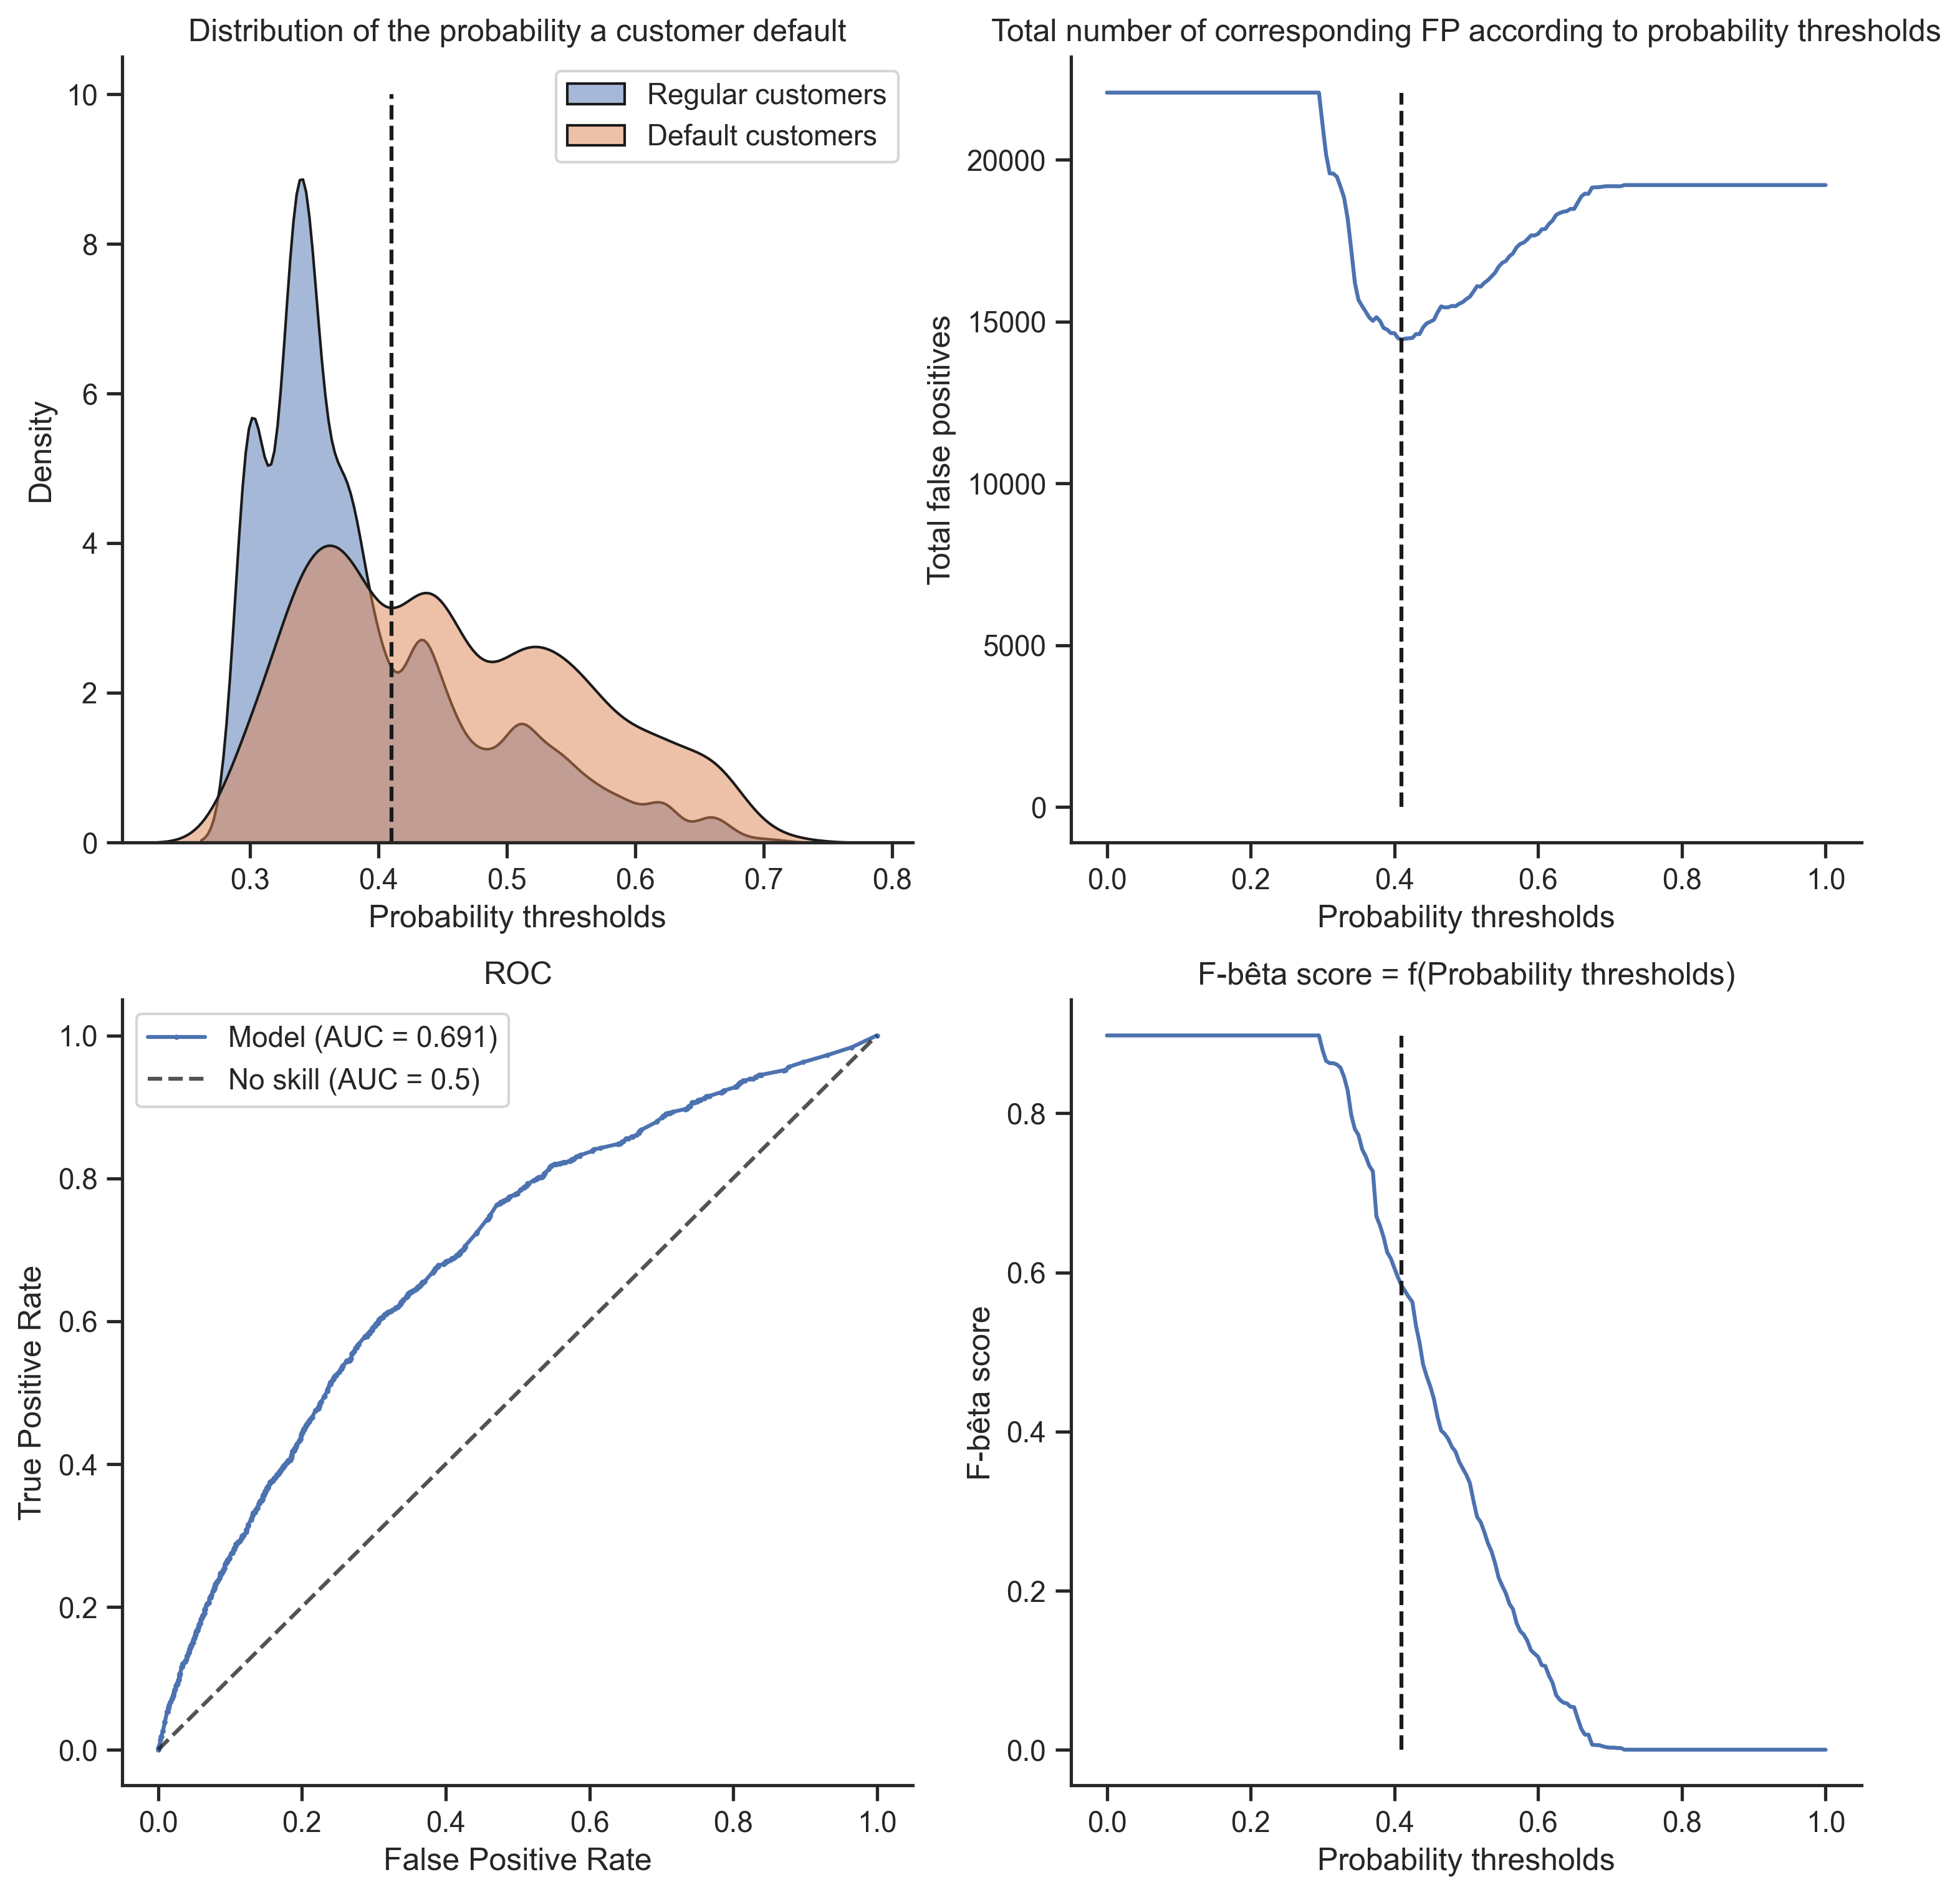

Confusion matrix:



----------------------------------------------------------------------------------------------------

Creating new entry...
Done!
The new informations have been saved in a new row.


Models   
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))  \
wt_logi_reg_clf_opt        (LogisticRegression(C=10.0, class_weight='bala...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
wt__scl_dummy_clf          (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(C=0.1, cla...   
wt_scl_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
wt_scl_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
wt_scl_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
resp_scl_dummy_clf         (MinMaxScaler(), SMOTE(random_state=0), DummyC...   
resp_scl_logi_reg_clf_opt  (MinMaxScaler(), SMOTE(k_neighbors=8, random_s...   
resp_scl_rf_clf_opt        (MinMaxScaler(), SMOTE(k_neighbors=6, random_s...   
resp_scl_xgb_clf_opt       (MinMaxScaler(), SMOTE(k_neighbors=10, random_...   
resp_scl_lgbm_clf_opt      (MinMaxScaler(), SMOTE(k_neighbors=4, random_s...   

                                                                  yhat_train   
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt        [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt              [0.5402593881951335, 0.666153240733321, 0.2059...   
wt_xgb_clf_opt             [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt            [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf           [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
wt_scl_logi_reg_clf_opt    [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt          [0.41599445259826257, 0.6717023650467243, 0.21...   
wt_scl_xgb_clf_opt         [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt        [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
resp_scl_logi_reg_clf_opt  [0.6768077239116567, 0.704235189027842, 0.2504...   
resp_scl_rf_clf_opt        [0.44877952179094, 0.39214759594080456, 0.1033...   
resp_scl_xgb_clf_opt       [0.5393323, 0.5976353, 0.28226593, 0.43437245,...   
resp_scl_lgbm_clf_opt      [0.5082833230094336, 0.5401289031217412, 0.297...   

                                                                   yhat_test   
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt        [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt              [0.47087781094224285, 0.633438976839338, 0.209...   
wt_xgb_clf_opt             [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt            [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_logi_reg_clf_opt    [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt          [0.5270956500020593, 0.6646669472798391, 0.163...   
wt_scl_xgb_clf_opt         [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt        [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf         [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...   
resp_scl_logi_reg_clf_opt  [0.6768077239116567, 0.704235189027842, 0

In [87]:
# Evaluate the model and store the results in the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TRAIN, y = y_TRAIN, cv = SKF_5,
                           eval_dataset = 'valid_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

#### v. Generalization over the test set


ROC-AUC = 0.690630
F-Bêta score of the optimal threshold found = 0.583
Highest F-Bêta score = 0.898
Job score: 0.650

----------------------------------------------------------------------------------------------------



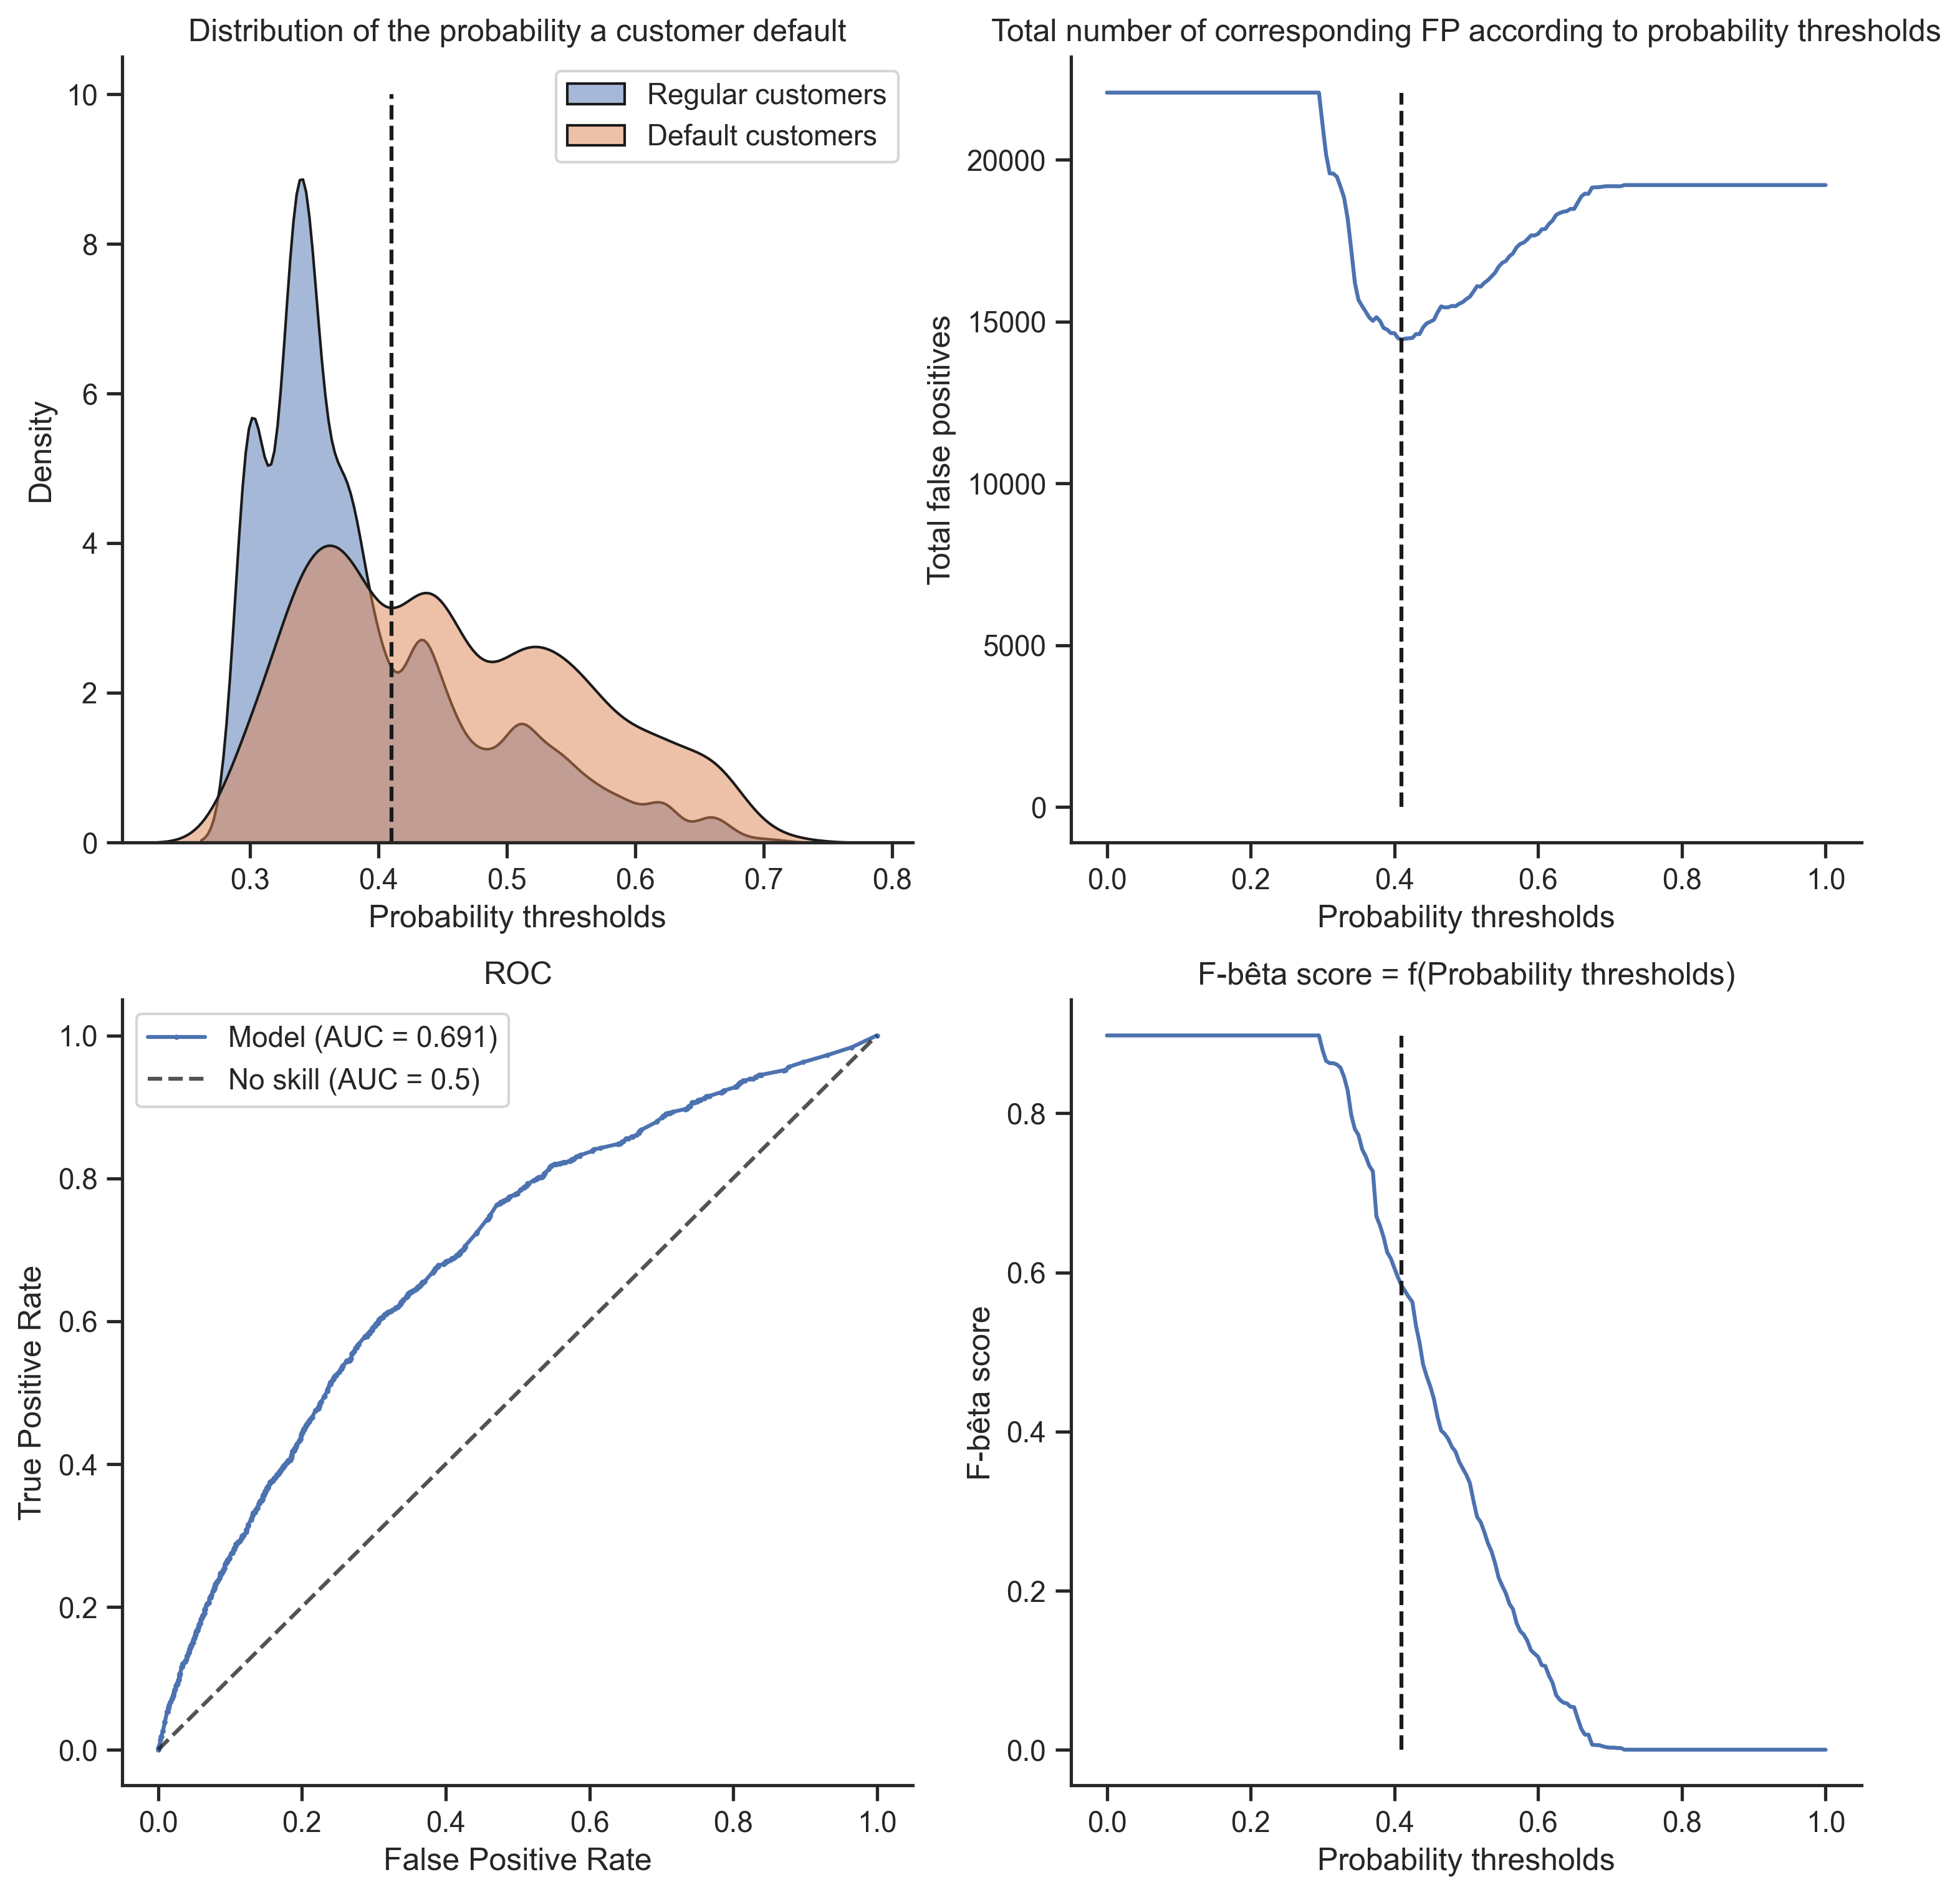

Confusion matrix:



----------------------------------------------------------------------------------------------------

Updating entry...
Done!
The row have been updated.


Models   
Model_labels                                                                   
wt_dummy_clf                        (DummyClassifier(strategy='stratified'))  \
wt_logi_reg_clf_opt        (LogisticRegression(C=10.0, class_weight='bala...   
wt_rf_clf_opt              ((DecisionTreeClassifier(max_depth=10, min_sam...   
wt_xgb_clf_opt             (XGBClassifier(base_score=None, booster=None, ...   
wt_lgbm_clf_opt            (LGBMClassifier(class_weight='balanced', colsa...   
wt__scl_dummy_clf          (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_dummy_clf           (MinMaxScaler(), DummyClassifier(strategy='str...   
wt_scl_logi_reg_clf_opt    (MinMaxScaler(), LogisticRegression(C=0.1, cla...   
wt_scl_rf_clf_opt          (MinMaxScaler(), (DecisionTreeClassifier(max_d...   
wt_scl_xgb_clf_opt         (MinMaxScaler(), XGBClassifier(base_score=None...   
wt_scl_lgbm_clf_opt        (MinMaxScaler(), LGBMClassifier(class_weight='...   
resp_scl_dummy_clf         (MinMaxScaler(), SMOTE(random_state=0), DummyC...   
resp_scl_logi_reg_clf_opt  (MinMaxScaler(), SMOTE(k_neighbors=8, random_s...   
resp_scl_rf_clf_opt        (MinMaxScaler(), SMOTE(k_neighbors=6, random_s...   
resp_scl_xgb_clf_opt       (MinMaxScaler(), SMOTE(k_neighbors=10, random_...   
resp_scl_lgbm_clf_opt      (MinMaxScaler(), SMOTE(k_neighbors=4, random_s...   

                                                                  yhat_train   
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt        [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt              [0.5402593881951335, 0.666153240733321, 0.2059...   
wt_xgb_clf_opt             [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt            [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf           [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
wt_scl_logi_reg_clf_opt    [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt          [0.41599445259826257, 0.6717023650467243, 0.21...   
wt_scl_xgb_clf_opt         [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt        [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
resp_scl_logi_reg_clf_opt  [0.6768077239116567, 0.704235189027842, 0.2504...   
resp_scl_rf_clf_opt        [0.44877952179094, 0.39214759594080456, 0.1033...   
resp_scl_xgb_clf_opt       [0.5393323, 0.5976353, 0.28226593, 0.43437245,...   
resp_scl_lgbm_clf_opt      [0.5082833230094336, 0.5401289031217412, 0.297...   

                                                                   yhat_test   
Model_labels                                                                   
wt_dummy_clf               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  \
wt_logi_reg_clf_opt        [0.6034569721228468, 0.540565109319611, 0.4294...   
wt_rf_clf_opt              [0.47087781094224285, 0.633438976839338, 0.209...   
wt_xgb_clf_opt             [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_lgbm_clf_opt            [0.5313398270132812, 0.6630302872815883, 0.155...   
wt__scl_dummy_clf          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_dummy_clf           [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...   
wt_scl_logi_reg_clf_opt    [0.6511342865960241, 0.663036596831487, 0.2158...   
wt_scl_rf_clf_opt          [0.5270956500020593, 0.6646669472798391, 0.163...   
wt_scl_xgb_clf_opt         [0.53995883, 0.6049088, 0.3007085, 0.30866343,...   
wt_scl_lgbm_clf_opt        [0.41780578654157957, 0.64516167621025, 0.2041...   
resp_scl_dummy_clf         [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...   
resp_scl_logi_reg_clf_opt  [0.6768077239116567, 0.704235189027842, 0

In [88]:
# Evaluate the model over the test set and store the results within the storage dataframe.
df_MODELS = block_evaluate(model_pl_opt, df_MODELS, model_label,
                           X = X_TEST, y = y_TEST, cv = SKF_5,
                           eval_dataset = 'test_set',
                           get_csv_file = GET_CSV_FILE)

# Show the table.
display(df_MODELS)

### f) Models comparison

#### i. Functions

In [ ]:
def figure_barplot (df, x_labels = 'Model_labels', y_label = 'Score', title = None):
    
    # Rearrange the df such as it fits the seaborn.barplot() data format.
    tidy = df.reset_index().melt(id_vars=x_labels, value_name=y_label, var_name='')
    
    # Plot the figure.
    ax = sns.barplot(data=tidy, y=x_labels, x=y_label, hue='', orient='h', edgecolor='k')
    
    plt.ylabel = ' '
    
    # Set the figure title.
    plt.title(title)
    
    #return ax

#### ii. Figures

*__- ROCs comparison__*

In [ ]:
%%time

# Draw the ROCs.
figure_roc(y_TRAIN, df_MODELS['yhat_train'], df_MODELS.index)

*__- Scores and processing times comparisons__*

In [ ]:
%%time

### Configuration ###

# Select the columns to compare.
l_features_peers = [
                    ['Job_score_train', 'Job_score_test'],
                    ['AUROC_scores_train', 'AUROC_scores_test'],
                    ['F-bêta_score_train', 'F-bêta_score_test'],
                    ['Process_time_train (s)', 'Process_time_test (s)']
                   ]

# Set each subplot titles.
l_subplot_titles = ["Job scores on the train and the test set",
                    "AUROC scores on the train and the test set",
                    "F-Bêta scores on the train and the test set",
                    "Processing times on the train and the test set"]

# Set the figure environment.
fig = plt.figure(figsize=(10,10), dpi=300)

# Set the whole figure title.
fig.suptitle("Models comparison: No data sampling")

# Initialize the subplot grid (2 lines x 2 columns).
l, c = int(len(l_features_peers) / 2), 2


### Plotting ###

# Run the loop to drw and position each subplot on the figure's subplot grid.
i = 0
for i in range(len(l_features_peers)):

    # Get the columns and the subplot title to plot.
    features_peer = l_features_peers[i]
    subplot_title = l_subplot_titles[i]
    
    # Set the position of the subplot.
    p = i + 1
    plt.subplot(l, c, p)
    
    # Plot the subplot.
    figure_barplot(df_MODELS[features_peer],
                   x_labels = 'Model_labels', y_label = 'Scores',
                   title = subplot_title)
    

### Drawing ###

# Arrange the subplots such as they are not superimposing each others. 
plt.tight_layout()

# Draw the figure.
plt.show()